# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Establish Dependencies and Import Modules

In [2]:
# Dependencies and Setup
from citipy import citipy
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
# Import API key
from api_keys import weather_api_key


In [3]:
# Dependencies and Setup

my_api_key = "f3af3fae29dab86054ade88388acfafc"

# Incorporated citipy to determine city based on latitude and longitude
city_df = pd.read_csv('../data_files/cities.csv')
city_df.dropna(inplace = True) 
print(city_df.head())



# Output File (CSV)
output_data_file = "data_files/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

   name patitirion
0   lat      39.15
1   lon      23.87
2  temp      66.99
3   hum         39
4  wind        3.4


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + my_api_key
lstweather = []
city_dict={}
counter = 1
dfi = pd.DataFrame()
with open('../data_files/cities.csv','w') as f:
    #w = csv.writer(f)
    
    for c in cities:
        c_url = url + "&q="+c
        lstweather = requests.get(c_url).json()
        pprint(lstweather)
        if lstweather["cod"] != "404": 
            kywind = lstweather["wind"]
            kycloud = lstweather["clouds"]
            kymain = lstweather["main"]
            kycoord = lstweather["coord"]
            tmax = kymain["temp_max"]
            vhum = kymain["humidity"]
            vlat = kycoord["lat"]
            vlon = kycoord["lon"]
            vwind = kywind["speed"]
            ctemp = kymain["temp"]
            vcloud = kycloud["all"]
            city_dict ={
            "name":c, 
            "lat":vlat, 
            "lon":vlon,
            "temp":ctemp,
            "hum":vhum,
            "wind": vwind,
            "cloud" :vcloud,
            "maxt":tmax}  
            print("city Dictionary: ", city_dict)
            #w.writerows(city_dict.items())
            df  = pd.DataFrame([city_dict], columns=city_dict.keys())
            print(df)
            dfi = dfi.append(df, ignore_index=True)
            print (dfi)
    counter = counter +1



{'base': 'stations',
 'clouds': {'all': 34},
 'cod': 200,
 'coord': {'lat': 71.97, 'lon': 102.5},
 'dt': 1587338572,
 'id': 2022572,
 'main': {'feels_like': 16.29,
          'grnd_level': 1028,
          'humidity': 95,
          'pressure': 1031,
          'sea_level': 1031,
          'temp': 24.04,
          'temp_max': 24.04,
          'temp_min': 24.04},
 'name': 'Khatanga',
 'sys': {'country': 'RU', 'sunrise': 1587327490, 'sunset': 1587391152},
 'timezone': 25200,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 191, 'speed': 5.41}}
city Dictionary:  {'name': 'khatanga', 'lat': 71.97, 'lon': 102.5, 'temp': 24.04, 'hum': 95, 'wind': 5.41, 'cloud': 34, 'maxt': 24.04}
       name    lat    lon   temp  hum  wind  cloud   maxt
0  khatanga  71.97  102.5  24.04   95  5.41     34  24.04
       name    lat    lon   temp  hum  wind  cloud   maxt
0  khatanga  71.97  102.5  24.04   95  5.4

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 19.21, 'lon': -69.34},
 'dt': 1587338573,
 'id': 3492997,
 'main': {'feels_like': 84.92,
          'humidity': 69,
          'pressure': 1014,
          'temp': 82.4,
          'temp_max': 82.4,
          'temp_min': 82.4},
 'name': 'Samaná',
 'sys': {'country': 'DO',
         'id': 7047,
         'sunrise': 1587291387,
         'sunset': 1587336952,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 107, 'speed': 10.16}}
city Dictionary:  {'name': 'samana', 'lat': 19.21, 'lon': -69.34, 'temp': 82.4, 'hum': 69, 'wind': 10.16, 'cloud': 20, 'maxt': 82.4}
     name    lat    lon  temp  hum   wind  cloud  maxt
0  samana  19.21 -69.34  82.4   69  10.16     20  82.4
           name    lat     lon   temp  hum   wind  cloud   maxt
0      khatanga  71.97  102.50

{'base': 'stations',
 'clouds': {'all': 83},
 'cod': 200,
 'coord': {'lat': -12.19, 'lon': -43.22},
 'dt': 1587338573,
 'id': 3461525,
 'main': {'feels_like': 75.27,
          'grnd_level': 968,
          'humidity': 81,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 71.73,
          'temp_max': 71.73,
          'temp_min': 71.73},
 'name': 'Ibotirama',
 'rain': {'3h': 0.58},
 'sys': {'country': 'BR', 'sunrise': 1587286691, 'sunset': 1587329112},
 'timezone': -10800,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 147, 'speed': 3.53}}
city Dictionary:  {'name': 'ibotirama', 'lat': -12.19, 'lon': -43.22, 'temp': 71.73, 'hum': 81, 'wind': 3.53, 'cloud': 83, 'maxt': 71.73}
        name    lat    lon   temp  hum  wind  cloud   maxt
0  ibotirama -12.19 -43.22  71.73   81  3.53     83  71.73
                  name    lat     lon   temp  hum   wind  cloud   maxt
0     

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -54.8, 'lon': -68.3},
 'dt': 1587338363,
 'id': 3833367,
 'main': {'feels_like': 22.75,
          'humidity': 86,
          'pressure': 993,
          'temp': 41,
          'temp_max': 41,
          'temp_min': 41},
 'name': 'Ushuaia',
 'sys': {'country': 'AR',
         'id': 8303,
         'sunrise': 1587295939,
         'sunset': 1587331901,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 27.51}}
city Dictionary:  {'name': 'ushuaia', 'lat': -54.8, 'lon': -68.3, 'temp': 41, 'hum': 86, 'wind': 27.51, 'cloud': 90, 'maxt': 41}
      name   lat   lon  temp  hum   wind  cloud  maxt
0  ushuaia -54.8 -68.3    41   86  27.51     90    41
                  name    lat     lon   temp  hum   wind  cloud   maxt
0             khatanga  71.97  

{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': -33.65, 'lon': 115.33},
 'dt': 1587338575,
 'id': 2075265,
 'main': {'feels_like': 41.56,
          'humidity': 63,
          'pressure': 1005,
          'temp': 54.68,
          'temp_max': 57.99,
          'temp_min': 51.01},
 'name': 'Busselton',
 'sys': {'country': 'AU',
         'id': 2011706,
         'sunrise': 1587336276,
         'sunset': 1587376210,
         'type': 3},
 'timezone': 28800,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 297, 'speed': 20.2}}
city Dictionary:  {'name': 'busselton', 'lat': -33.65, 'lon': 115.33, 'temp': 54.68, 'hum': 63, 'wind': 20.2, 'cloud': 78, 'maxt': 57.99}
        name    lat     lon   temp  hum  wind  cloud   maxt
0  busselton -33.65  115.33  54.68   63  20.2     78  57.99
                  name    lat     lon   temp  hum   wind  cloud   maxt
0             khata

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 57.79, 'lon': -152.41},
 'dt': 1587338399,
 'id': 5866583,
 'main': {'feels_like': 36.79,
          'humidity': 75,
          'pressure': 1011,
          'temp': 46.4,
          'temp_max': 46.4,
          'temp_min': 46.4},
 'name': 'Saint Paul Harbor',
 'sys': {'country': 'US',
         'id': 7668,
         'sunrise': 1587307585,
         'sunset': 1587360622,
         'type': 1},
 'timezone': -28800,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'speed': 12.75}}
city Dictionary:  {'name': 'kodiak', 'lat': 57.79, 'lon': -152.41, 'temp': 46.4, 'hum': 75, 'wind': 12.75, 'cloud': 90, 'maxt': 46.4}
     name    lat     lon  temp  hum   wind  cloud  maxt
0  kodiak  57.79 -152.41  46.4   75  12.75     90  46.4
                  name    lat     lon   temp  hum   wind  cloud   maxt
0   

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 64.25, 'lon': -15.21},
 'dt': 1587338577,
 'id': 2630299,
 'main': {'feels_like': 37.02,
          'grnd_level': 1022,
          'humidity': 84,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 44.04,
          'temp_max': 44.04,
          'temp_min': 44.04},
 'name': 'Hofn',
 'sys': {'country': 'IS', 'sunrise': 1587273160, 'sunset': 1587329200},
 'timezone': 0,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 141, 'speed': 8.34}}
city Dictionary:  {'name': 'hofn', 'lat': 64.25, 'lon': -15.21, 'temp': 44.04, 'hum': 84, 'wind': 8.34, 'cloud': 99, 'maxt': 44.04}
   name    lat    lon   temp  hum  wind  cloud   maxt
0  hofn  64.25 -15.21  44.04   84  8.34     99  44.04
                  name    lat     lon   temp  hum   wind  cloud   maxt
0             khatanga  71.97  102.50  24.04   9

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -8.65, 'lon': 115.22},
 'dt': 1587338577,
 'id': 1645528,
 'main': {'feels_like': 90.88,
          'humidity': 100,
          'pressure': 1011,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Denpasar',
 'sys': {'country': 'ID',
         'id': 9333,
         'sunrise': 1587334891,
         'sunset': 1587377647,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'speed': 1.12}}
city Dictionary:  {'name': 'denpasar', 'lat': -8.65, 'lon': 115.22, 'temp': 78.8, 'hum': 100, 'wind': 1.12, 'cloud': 20, 'maxt': 78.8}
       name   lat     lon  temp  hum  wind  cloud  maxt
0  denpasar -8.65  115.22  78.8  100  1.12     20  78.8
                  name    lat     lon   temp  hum   wind  cloud   maxt
0             khatanga  71.97 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 69.45, 'lon': -133.04},
 'dt': 1587338578,
 'id': 6170031,
 'main': {'feels_like': -0.74,
          'humidity': 85,
          'pressure': 1014,
          'temp': 10.4,
          'temp_max': 10.4,
          'temp_min': 10.4},
 'name': 'Tuktoyaktuk',
 'sys': {'country': 'CA',
         'id': 942,
         'sunrise': 1587299298,
         'sunset': 1587359613,
         'type': 1},
 'timezone': -21600,
 'visibility': 12874,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 310, 'speed': 9.17}}
city Dictionary:  {'name': 'tuktoyaktuk', 'lat': 69.45, 'lon': -133.04, 'temp': 10.4, 'hum': 85, 'wind': 9.17, 'cloud': 90, 'maxt': 10.4}
          name    lat     lon  temp  hum  wind  cloud  maxt
0  tuktoyaktuk  69.45 -133.04  10.4   85  9.17     90  10.4
                  name    lat     lon   temp  hum   wind  cloud   maxt
0     

{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 5.38, 'lon': -52.95},
 'dt': 1587338578,
 'id': 3380290,
 'main': {'feels_like': 80.56,
          'grnd_level': 1013,
          'humidity': 84,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 79.9,
          'temp_max': 79.9,
          'temp_min': 79.9},
 'name': 'Sinnamary',
 'rain': {'3h': 3.47},
 'sys': {'country': 'GF', 'sunrise': 1587288171, 'sunset': 1587332301},
 'timezone': -10800,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 61, 'speed': 16.82}}
city Dictionary:  {'name': 'sinnamary', 'lat': 5.38, 'lon': -52.95, 'temp': 79.9, 'hum': 84, 'wind': 16.82, 'cloud': 97, 'maxt': 79.9}
        name   lat    lon  temp  hum   wind  cloud  maxt
0  sinnamary  5.38 -52.95  79.9   84  16.82     97  79.9
                  name    lat     lon   temp  hum   wind  cloud   maxt
0             

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 35.13, 'lon': 140.3},
 'dt': 1587338579,
 'id': 2112309,
 'main': {'feels_like': 46.53,
          'humidity': 87,
          'pressure': 1015,
          'temp': 51.04,
          'temp_max': 51.8,
          'temp_min': 50},
 'name': 'Katsuura',
 'sys': {'country': 'JP',
         'id': 8052,
         'sunrise': 1587326416,
         'sunset': 1587374085,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09d',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 40, 'speed': 6.93}}
city Dictionary:  {'name': 'katsuura', 'lat': 35.13, 'lon': 140.3, 'temp': 51.04, 'hum': 87, 'wind': 6.93, 'cloud': 75, 'maxt': 51.8}
       name    lat    lon   temp  hum  wind  cloud  maxt
0  katsuura  35.13  140.3  51.04   87  6.93     75  51.8
                  name    lat     lon   temp  hum   wind  cloud   maxt
0     

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 19.22, 'lon': -104.7},
 'dt': 1587338579,
 'id': 3985168,
 'main': {'feels_like': 72.09,
          'humidity': 78,
          'pressure': 1009,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'San Patricio',
 'sys': {'country': 'MX',
         'id': 7166,
         'sunrise': 1587299868,
         'sunset': 1587345441,
         'type': 1},
 'timezone': -18000,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 260, 'speed': 17.22}}
city Dictionary:  {'name': 'san patricio', 'lat': 19.22, 'lon': -104.7, 'temp': 75.2, 'hum': 78, 'wind': 17.22, 'cloud': 5, 'maxt': 75.2}
           name    lat    lon  temp  hum   wind  cloud  maxt
0  san patricio  19.22 -104.7  75.2   78  17.22      5  75.2
                  name    lat     lon   temp  hum   wind  cloud   maxt
0  

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 26.59, 'lon': 127.98},
 'dt': 1587338549,
 'id': 1856068,
 'main': {'feels_like': 63.73,
          'humidity': 93,
          'pressure': 1016,
          'temp': 65.53,
          'temp_max': 66.2,
          'temp_min': 64.4},
 'name': 'Nago',
 'sys': {'country': 'JP',
         'id': 8138,
         'sunrise': 1587329969,
         'sunset': 1587376446,
         'type': 1},
 'timezone': 32400,
 'visibility': 11265,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 20, 'speed': 11.41}}
city Dictionary:  {'name': 'nago', 'lat': 26.59, 'lon': 127.98, 'temp': 65.53, 'hum': 93, 'wind': 11.41, 'cloud': 75, 'maxt': 66.2}
   name    lat     lon   temp  hum   wind  cloud  maxt
0  nago  26.59  127.98  65.53   93  11.41     75  66.2
                  name    lat     lon   temp  hum   wind  cloud   maxt
0             khatanga  71

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 50.2, 'lon': -66.38},
 'dt': 1587338580,
 'id': 6144312,
 'main': {'feels_like': 20.5,
          'humidity': 97,
          'pressure': 999,
          'temp': 32,
          'temp_max': 32,
          'temp_min': 32},
 'name': 'Sept-Îles',
 'sys': {'country': 'CA',
         'id': 1013,
         'sunrise': 1587288170,
         'sunset': 1587338748,
         'type': 1},
 'timezone': -14400,
 'visibility': 48279,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'gust': 19.46, 'speed': 13.87}}
city Dictionary:  {'name': 'sept-iles', 'lat': 50.2, 'lon': -66.38, 'temp': 32, 'hum': 97, 'wind': 13.87, 'cloud': 90, 'maxt': 32}
        name   lat    lon  temp  hum   wind  cloud  maxt
0  sept-iles  50.2 -66.38    32   97  13.87     90    32
                  name    lat     lon   temp  hum   wind  cloud   maxt
0       

{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 'coord': {'lat': 14.28, 'lon': 77.17},
 'dt': 1587338581,
 'id': 1269947,
 'main': {'feels_like': 74.68,
          'grnd_level': 941,
          'humidity': 44,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 77.07,
          'temp_max': 77.07,
          'temp_min': 77.07},
 'name': 'Hoskote',
 'sys': {'country': 'IN', 'sunrise': 1587342871, 'sunset': 1587387929},
 'timezone': 19800,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 6.15}}
city Dictionary:  {'name': 'hosakote', 'lat': 14.28, 'lon': 77.17, 'temp': 77.07, 'hum': 44, 'wind': 6.15, 'cloud': 33, 'maxt': 77.07}
       name    lat    lon   temp  hum  wind  cloud   maxt
0  hosakote  14.28  77.17  77.07   44  6.15     33  77.07
                  name    lat     lon   temp  hum   wind  cloud   maxt
0             khatanga  71.97  

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -13.7, 'lon': -76.22},
 'dt': 1587338581,
 'id': 3932145,
 'main': {'feels_like': 65.19,
          'humidity': 73,
          'pressure': 1012,
          'temp': 70.92,
          'temp_max': 71.6,
          'temp_min': 70},
 'name': 'Pisco',
 'sys': {'country': 'PE',
         'id': 8691,
         'sunrise': 1587294688,
         'sunset': 1587336953,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 220, 'speed': 17.22}}
city Dictionary:  {'name': 'pisco', 'lat': -13.7, 'lon': -76.22, 'temp': 70.92, 'hum': 73, 'wind': 17.22, 'cloud': 0, 'maxt': 71.6}
    name   lat    lon   temp  hum   wind  cloud  maxt
0  pisco -13.7 -76.22  70.92   73  17.22      0  71.6
                  name    lat     lon   temp  hum   wind  cloud   maxt
0             khatanga  71.97  

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 71.29, 'lon': -156.79},
 'dt': 1587338582,
 'id': 5880054,
 'main': {'feels_like': 2.43,
          'humidity': 85,
          'pressure': 1015,
          'temp': 12.2,
          'temp_max': 12.2,
          'temp_min': 12.2},
 'name': 'Barrow',
 'sys': {'country': 'US',
         'id': 7649,
         'sunrise': 1587303898,
         'sunset': 1587366411,
         'type': 1},
 'timezone': -28800,
 'visibility': 12874,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 270, 'speed': 6.93}}
city Dictionary:  {'name': 'barrow', 'lat': 71.29, 'lon': -156.79, 'temp': 12.2, 'hum': 85, 'wind': 6.93, 'cloud': 90, 'maxt': 12.2}
     name    lat     lon  temp  hum  wind  cloud  maxt
0  barrow  71.29 -156.79  12.2   85  6.93     90  12.2
                  name    lat     lon   temp  hum   wind  cloud   maxt
0             khatanga  71

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 36.68, 'lon': -101.48},
 'dt': 1587338582,
 'id': 5515743,
 'main': {'feels_like': 64.98,
          'humidity': 26,
          'pressure': 1008,
          'temp': 72.52,
          'temp_max': 73.4,
          'temp_min': 69.8},
 'name': 'Guymon',
 'sys': {'country': 'US',
         'id': 4282,
         'sunrise': 1587297946,
         'sunset': 1587345817,
         'type': 1},
 'timezone': -18000,
 'visibility': 16093,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 8.05}}
city Dictionary:  {'name': 'guymon', 'lat': 36.68, 'lon': -101.48, 'temp': 72.52, 'hum': 26, 'wind': 8.05, 'cloud': 20, 'maxt': 73.4}
     name    lat     lon   temp  hum  wind  cloud  maxt
0  guymon  36.68 -101.48  72.52   26  8.05     20  73.4
            name    lat     lon   temp  hum   wind  cloud   maxt
0       khatanga  71.97  1

{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': 71.92, 'lon': 114.08},
 'dt': 1587338583,
 'id': 2017155,
 'main': {'feels_like': 9.77,
          'grnd_level': 1031,
          'humidity': 95,
          'pressure': 1032,
          'sea_level': 1032,
          'temp': 17.15,
          'temp_max': 17.15,
          'temp_min': 17.15},
 'name': 'Saskylakh',
 'sys': {'country': 'RU', 'sunrise': 1587324760, 'sunset': 1587388325},
 'timezone': 32400,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 246, 'speed': 3.6}}
city Dictionary:  {'name': 'saskylakh', 'lat': 71.92, 'lon': 114.08, 'temp': 17.15, 'hum': 95, 'wind': 3.6, 'cloud': 2, 'maxt': 17.15}
        name    lat     lon   temp  hum  wind  cloud   maxt
0  saskylakh  71.92  114.08  17.15   95   3.6      2  17.15
            name    lat     lon   temp  hum   wind  cloud   maxt
0       khatanga  71.97  102.50  24.04  

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 42.1, 'lon': -79.24},
 'dt': 1587338584,
 'id': 5122534,
 'main': {'feels_like': 35.74,
          'humidity': 81,
          'pressure': 1006,
          'temp': 45.19,
          'temp_max': 46,
          'temp_min': 44.6},
 'name': 'Jamestown',
 'rain': {'1h': 0.25},
 'sys': {'country': 'US',
         'id': 4588,
         'sunrise': 1587292144,
         'sunset': 1587340946,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 260, 'speed': 12.75}}
city Dictionary:  {'name': 'jamestown', 'lat': 42.1, 'lon': -79.24, 'temp': 45.19, 'hum': 81, 'wind': 12.75, 'cloud': 90, 'maxt': 46}
        name   lat    lon   temp  hum   wind  cloud  maxt
0  jamestown  42.1 -79.24  45.19   81  12.75     90    46
            name    lat     lon   temp  hum   wind  cloud   maxt


{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': -46.6, 'lon': 168.33},
 'dt': 1587338585,
 'id': 2206939,
 'main': {'feels_like': 49.5,
          'humidity': 72,
          'pressure': 1010,
          'temp': 54,
          'temp_max': 54,
          'temp_min': 54},
 'name': 'Bluff',
 'rain': {'3h': 0.2},
 'sys': {'country': 'NZ',
         'id': 2008959,
         'sunrise': 1587324608,
         'sunset': 1587362441,
         'type': 3},
 'timezone': 43200,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 325, 'gust': 14, 'speed': 5.99}}
city Dictionary:  {'name': 'bluff', 'lat': -46.6, 'lon': 168.33, 'temp': 54, 'hum': 72, 'wind': 5.99, 'cloud': 78, 'maxt': 54}
    name   lat     lon  temp  hum  wind  cloud  maxt
0  bluff -46.6  168.33    54   72  5.99     78    54
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  2

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 45.13, 'lon': 27.45},
 'dt': 1587338586,
 'id': 675840,
 'main': {'feels_like': 32.74,
          'humidity': 66,
          'pressure': 1013,
          'temp': 50,
          'temp_max': 50,
          'temp_min': 50},
 'name': 'Ianca',
 'sys': {'country': 'RO',
         'id': 9687,
         'sunrise': 1587352567,
         'sunset': 1587402095,
         'type': 1},
 'timezone': 10800,
 'visibility': 5000,
 'weather': [{'description': 'shower rain',
              'icon': '09n',
              'id': 521,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 30, 'speed': 26.4}}
city Dictionary:  {'name': 'ianca', 'lat': 45.13, 'lon': 27.45, 'temp': 50, 'hum': 66, 'wind': 26.4, 'cloud': 90, 'maxt': 50}
    name    lat    lon  temp  hum  wind  cloud  maxt
0  ianca  45.13  27.45    50   66  26.4     90    50
            name    lat     lon   temp 

{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 43.13, 'lon': -115.69},
 'dt': 1587338480,
 'id': 5601615,
 'main': {'feels_like': 54.95,
          'humidity': 19,
          'pressure': 1013,
          'temp': 66.11,
          'temp_max': 68,
          'temp_min': 64},
 'name': 'Mountain Home',
 'sys': {'country': 'US',
         'id': 5002,
         'sunrise': 1587300784,
         'sunset': 1587349800,
         'type': 1},
 'timezone': -21600,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 350, 'speed': 11.41}}
city Dictionary:  {'name': 'mountain home', 'lat': 43.13, 'lon': -115.69, 'temp': 66.11, 'hum': 19, 'wind': 11.41, 'cloud': 1, 'maxt': 68}
            name    lat     lon   temp  hum   wind  cloud  maxt
0  mountain home  43.13 -115.69  66.11   19 

{'base': 'stations',
 'clouds': {'all': 47},
 'cod': 200,
 'coord': {'lat': 16.45, 'lon': -85.85},
 'dt': 1587338589,
 'id': 3601402,
 'main': {'feels_like': 76.32,
          'grnd_level': 1009,
          'humidity': 80,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 82.18,
          'temp_max': 82.18,
          'temp_min': 82.18},
 'name': 'Savannah Bight',
 'sys': {'country': 'HN', 'sunrise': 1587295498, 'sunset': 1587340764},
 'timezone': -21600,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 89, 'speed': 29.19}}
city Dictionary:  {'name': 'savannah bight', 'lat': 16.45, 'lon': -85.85, 'temp': 82.18, 'hum': 80, 'wind': 29.19, 'cloud': 47, 'maxt': 82.18}
             name    lat    lon   temp  hum   wind  cloud   maxt
0  savannah bight  16.45 -85.85  82.18   80  29.19     47  82.18
              name    lat     lon   temp  hum   wind  cloud   maxt
0  

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 50.23, 'lon': -99.47},
 'dt': 1587338590,
 'id': 6086673,
 'main': {'feels_like': 37.13,
          'humidity': 37,
          'pressure': 1000,
          'temp': 53.6,
          'temp_max': 53.6,
          'temp_min': 53.6},
 'name': 'Neepawa',
 'sys': {'country': 'CA',
         'id': 750,
         'sunrise': 1587296097,
         'sunset': 1587346702,
         'type': 1},
 'timezone': -18000,
 'visibility': 24140,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'gust': 34.45, 'speed': 21.92}}
city Dictionary:  {'name': 'neepawa', 'lat': 50.23, 'lon': -99.47, 'temp': 53.6, 'hum': 37, 'wind': 21.92, 'cloud': 75, 'maxt': 53.6}
      name    lat    lon  temp  hum   wind  cloud  maxt
0  neepawa  50.23 -99.47  53.6   37  21.92     75  53.6
              name    lat     lon   temp  hum   wind  cloud   maxt
0     

{'base': 'stations',
 'clouds': {'all': 54},
 'cod': 200,
 'coord': {'lat': -14.55, 'lon': 48.73},
 'dt': 1587338591,
 'id': 1068670,
 'main': {'feels_like': 58.42,
          'grnd_level': 893,
          'humidity': 69,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 60.58,
          'temp_max': 60.58,
          'temp_min': 60.58},
 'name': 'Bealanana',
 'sys': {'country': 'MG', 'sunrise': 1587351149, 'sunset': 1587393300},
 'timezone': 10800,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 94, 'speed': 4.14}}
city Dictionary:  {'name': 'bealanana', 'lat': -14.55, 'lon': 48.73, 'temp': 60.58, 'hum': 69, 'wind': 4.14, 'cloud': 54, 'maxt': 60.58}
        name    lat    lon   temp  hum  wind  cloud   maxt
0  bealanana -14.55  48.73  60.58   69  4.14     54  60.58
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 28.66, 'lon': -17.92},
 'dt': 1587338591,
 'id': 2514651,
 'main': {'feels_like': 60.21,
          'humidity': 72,
          'pressure': 1023,
          'temp': 64.4,
          'temp_max': 64.4,
          'temp_min': 64.4},
 'name': 'Los Llanos de Aridane',
 'sys': {'country': 'ES',
         'id': 2377,
         'sunrise': 1587364826,
         'sunset': 1587411611,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'speed': 10.29}}
city Dictionary:  {'name': 'los llanos de aridane', 'lat': 28.66, 'lon': -17.92, 'temp': 64.4, 'hum': 72, 'wind': 10.29, 'cloud': 20, 'maxt': 64.4}
                    name    lat    lon  temp  hum   wind  cloud  maxt
0  los llanos de aridane  28.66 -17.92  64.4   72  10.29     20  64.4
                      name    lat    

{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': 22.29, 'lon': 114.16},
 'dt': 1587338395,
 'id': 1819729,
 'main': {'feels_like': 79.12,
          'humidity': 83,
          'pressure': 1013,
          'temp': 74.43,
          'temp_max': 77,
          'temp_min': 68},
 'name': 'Hong Kong',
 'sys': {'country': 'HK',
         'id': 47808,
         'sunrise': 1587333547,
         'sunset': 1587379499,
         'type': 3},
 'timezone': 28800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 226, 'speed': 4.25}}
city Dictionary:  {'name': 'victoria', 'lat': 22.29, 'lon': 114.16, 'temp': 74.43, 'hum': 83, 'wind': 4.25, 'cloud': 85, 'maxt': 77}
       name    lat     lon   temp  hum  wind  cloud  maxt
0  victoria  22.29  114.16  74.43   83  4.25     85    77
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -3.7, 'lon': 128.18},
 'dt': 1587338594,
 'id': 1651531,
 'main': {'feels_like': 94.48,
          'humidity': 79,
          'pressure': 1011,
          'temp': 84.2,
          'temp_max': 84.2,
          'temp_min': 84.2},
 'name': 'Ambon City',
 'sys': {'country': 'ID',
         'id': 9361,
         'sunrise': 1587331537,
         'sunset': 1587374781,
         'type': 1},
 'timezone': 32400,
 'visibility': 8000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'speed': 2.24}}
city Dictionary:  {'name': 'ambon', 'lat': -3.7, 'lon': 128.18, 'temp': 84.2, 'hum': 79, 'wind': 2.24, 'cloud': 40, 'maxt': 84.2}
    name  lat     lon  temp  hum  wind  cloud  maxt
0  ambon -3.7  128.18  84.2   79  2.24     40  84.2
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   9

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 87},
 'cod': 200,
 'coord': {'lat': 40.42, 'lon': -120.65},
 'dt': 1587338595,
 'id': 5572400,
 'main': {'feels_like': 48.33,
          'humidity': 57,
          'pressure': 1028,
          'temp': 55.99,
          'temp_max': 55.99,
          'temp_min': 55.99},
 'name': 'Susanville',
 'rain': {'3h': 0.5},
 'sys': {'country': 'US',
         'id': 2016058,
         'sunrise': 1587302227,
         'sunset': 1587350737,
         'type': 3},
 'timezone': -25200,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 273, 'gust': 15.01, 'speed': 10}}
city Dictionary:  {'name': 'susanville', 'lat': 40.42, 'lon': -120.65, 'temp': 55.99, 'hum': 57, 'wind': 10, 'cloud': 87, 'maxt': 55.99}
         name    lat     lon   temp  hum  wind  cloud   maxt
0  susanville  40.42 -120.65  55.99   57    10     87  55.99
             

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -22.28, 'lon': 166.46},
 'dt': 1587338595,
 'id': 2139521,
 'main': {'feels_like': 83.32,
          'humidity': 100,
          'pressure': 1016,
          'temp': 74.91,
          'temp_max': 78.01,
          'temp_min': 69.8},
 'name': 'Noumea',
 'sys': {'country': 'NC',
         'id': 7344,
         'sunrise': 1587323302,
         'sunset': 1587364644,
         'type': 1},
 'timezone': 39600,
 'visibility': 1600,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'speed': 3.36}}
city Dictionary:  {'name': 'noumea', 'lat': -22.28, 'lon': 166.46, 'temp': 74.91, 'hum': 100, 'wind': 3.36, 'cloud': 100, 'maxt': 78.01}
     name    lat     lon   temp  hum  wind  cloud   maxt
0  noumea -22.28  166.46  74.91  100  3.36    100  78.01
              n

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.38, 'lon': 1.39},
 'dt': 1587338596,
 'id': 2643044,
 'main': {'feels_like': 45.95,
          'humidity': 80,
          'pressure': 1019,
          'temp': 49.66,
          'temp_max': 50,
          'temp_min': 48.99},
 'name': 'Margate',
 'sys': {'country': 'GB',
         'id': 2032271,
         'sunrise': 1587358048,
         'sunset': 1587409121,
         'type': 3},
 'timezone': 3600,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 63, 'gust': 8.01, 'speed': 4}}
city Dictionary:  {'name': 'margate', 'lat': 51.38, 'lon': 1.39, 'temp': 49.66, 'hum': 80, 'wind': 4, 'cloud': 0, 'maxt': 50}
      name    lat   lon   temp  hum  wind  cloud  maxt
0  margate  51.38  1.39  49.66   80     4      0    50
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   5.41

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -20.52, 'lon': 57.52},
 'dt': 1587338597,
 'id': 933995,
 'main': {'feels_like': 76.28,
          'humidity': 88,
          'pressure': 1015,
          'temp': 74.64,
          'temp_max': 75.2,
          'temp_min': 73.99},
 'name': 'Souillac',
 'sys': {'country': 'MU',
         'id': 2061,
         'sunrise': 1587349357,
         'sunset': 1587390873,
         'type': 1},
 'timezone': 14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 11.41}}
city Dictionary:  {'name': 'souillac', 'lat': -20.52, 'lon': 57.52, 'temp': 74.64, 'hum': 88, 'wind': 11.41, 'cloud': 40, 'maxt': 75.2}
       name    lat    lon   temp  hum   wind  cloud  maxt
0  souillac -20.52  57.52  74.64   88  11.41     40  75.2
             name    lat     lon   temp  hum   wind  cloud   maxt
0        kh

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 50},
 'cod': 200,
 'coord': {'lat': 52.33, 'lon': -6.46},
 'dt': 1587338598,
 'id': 2960964,
 'main': {'feels_like': 40.66,
          'humidity': 85,
          'pressure': 1019,
          'temp': 48.99,
          'temp_max': 48.99,
          'temp_min': 48.99},
 'name': 'Wexford',
 'sys': {'country': 'IE',
         'id': 2008093,
         'sunrise': 1587359793,
         'sunset': 1587411143,
         'type': 3},
 'timezone': 3600,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 88, 'speed': 12.59}}
city Dictionary:  {'name': 'wexford', 'lat': 52.33, 'lon': -6.46, 'temp': 48.99, 'hum': 85, 'wind': 12.59, 'cloud': 50, 'maxt': 48.99}
      name    lat   lon   temp  hum   wind  cloud   maxt
0  wexford  52.33 -6.46  48.99   85  12.59     50  48.99
                  name    lat     lon   temp  hum   wind 

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 60.75, 'lon': -137.51},
 'dt': 1587338599,
 'id': 5969025,
 'main': {'feels_like': 39,
          'grnd_level': 939,
          'humidity': 48,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 48.24,
          'temp_max': 48.24,
          'temp_min': 48.24},
 'name': 'Haines Junction',
 'sys': {'country': 'CA', 'sunrise': 1587303383, 'sunset': 1587357673},
 'timezone': -25200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 187, 'speed': 9.42}}
city Dictionary:  {'name': 'haines junction', 'lat': 60.75, 'lon': -137.51, 'temp': 48.24, 'hum': 48, 'wind': 9.42, 'cloud': 98, 'maxt': 48.24}
              name    lat     lon   temp  hum  wind  cloud   maxt
0  haines junction  60.75 -137.51  48.24   48  9.42     98  48.24
                name    lat     lon   temp  hum   wind  cloud   maxt
0

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 57.14, 'lon': -2.1},
 'dt': 1587338536,
 'id': 2657832,
 'main': {'feels_like': 31.93,
          'humidity': 93,
          'pressure': 1029,
          'temp': 37.56,
          'temp_max': 41,
          'temp_min': 33.01},
 'name': 'Aberdeen',
 'sys': {'country': 'GB',
         'id': 1440,
         'sunrise': 1587357945,
         'sunset': 1587410899,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 150, 'speed': 4.7}}
city Dictionary:  {'name': 'aberdeen', 'lat': 57.14, 'lon': -2.1, 'temp': 37.56, 'hum': 93, 'wind': 4.7, 'cloud': 0, 'maxt': 41}
       name    lat  lon   temp  hum  wind  cloud  maxt
0  aberdeen  57.14 -2.1  37.56   93   4.7      0    41
                name    lat     lon   temp  hum   wind  cloud   maxt
0           khatanga  71.97  102.50 

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 22.89, 'lon': -109.91},
 'dt': 1587338417,
 'id': 3985710,
 'main': {'feels_like': 73.96,
          'humidity': 44,
          'pressure': 1014,
          'temp': 77.34,
          'temp_max': 78.8,
          'temp_min': 75.99},
 'name': 'Cabo San Lucas',
 'sys': {'country': 'MX',
         'id': 7151,
         'sunrise': 1587300907,
         'sunset': 1587346903,
         'type': 1},
 'timezone': -21600,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 120, 'speed': 8.05}}
city Dictionary:  {'name': 'cabo san lucas', 'lat': 22.89, 'lon': -109.91, 'temp': 77.34, 'hum': 44, 'wind': 8.05, 'cloud': 5, 'maxt': 78.8}
             name    lat     lon   temp  hum  wind  cloud  maxt
0  cabo san lucas  22.89 -109.91  77.34   44  8.05      5  78.8
               name    lat     lon   temp  hum   wind  cloud 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.18, 'lon': 31.18},
 'dt': 1587338601,
 'id': 359783,
 'main': {'feels_like': 58.39,
          'humidity': 52,
          'pressure': 1012,
          'temp': 64.4,
          'temp_max': 64.4,
          'temp_min': 64.4},
 'name': 'Assiut',
 'sys': {'country': 'EG',
         'id': 2510,
         'sunrise': 1587353147,
         'sunset': 1587399724,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 310, 'speed': 9.17}}
city Dictionary:  {'name': 'asyut', 'lat': 27.18, 'lon': 31.18, 'temp': 64.4, 'hum': 52, 'wind': 9.17, 'cloud': 0, 'maxt': 64.4}
    name    lat    lon  temp  hum  wind  cloud  maxt
0  asyut  27.18  31.18  64.4   52  9.17      0  64.4
                name    lat     lon   temp  hum   wind  cloud   maxt
0           khatanga  71.97  102.50  24.0

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.4, 'lon': -70.48},
 'dt': 1587338602,
 'id': 3870243,
 'main': {'feels_like': 60.6,
          'grnd_level': 1014,
          'humidity': 75,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 60.87,
          'temp_max': 60.87,
          'temp_min': 60.87},
 'name': 'Taltal',
 'sys': {'country': 'CL', 'sunrise': 1587293936, 'sunset': 1587334950},
 'timezone': -14400,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 211, 'speed': 2.08}}
city Dictionary:  {'name': 'taltal', 'lat': -25.4, 'lon': -70.48, 'temp': 60.87, 'hum': 75, 'wind': 2.08, 'cloud': 0, 'maxt': 60.87}
     name   lat    lon   temp  hum  wind  cloud   maxt
0  taltal -25.4 -70.48  60.87   75  2.08      0  60.87
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   5.41 

{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': -32.72, 'lon': 152.15},
 'dt': 1587338603,
 'id': 2155562,
 'main': {'feels_like': 56.43,
          'humidity': 63,
          'pressure': 1017,
          'temp': 62.28,
          'temp_max': 64,
          'temp_min': 60.8},
 'name': 'Nelson Bay',
 'sys': {'country': 'AU',
         'id': 9605,
         'sunrise': 1587327371,
         'sunset': 1587367443,
         'type': 1},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'speed': 10.29}}
city Dictionary:  {'name': 'nelson bay', 'lat': -32.72, 'lon': 152.15, 'temp': 62.28, 'hum': 63, 'wind': 10.29, 'cloud': 86, 'maxt': 64}
         name    lat     lon   temp  hum   wind  cloud  maxt
0  nelson bay -32.72  152.15  62.28   63  10.29     86    64
              name    lat     lon   temp  hum   wind  cloud   maxt
0  

{'base': 'stations',
 'clouds': {'all': 61},
 'cod': 200,
 'coord': {'lat': 21.28, 'lon': 110.34},
 'dt': 1587338604,
 'id': 1784990,
 'main': {'feels_like': 78.4,
          'grnd_level': 1008,
          'humidity': 85,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 77.29,
          'temp_max': 77.29,
          'temp_min': 77.29},
 'name': 'Zhanjiang',
 'sys': {'country': 'CN', 'sunrise': 1587334523, 'sunset': 1587380357},
 'timezone': 28800,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 123, 'speed': 13.82}}
city Dictionary:  {'name': 'zhanjiang', 'lat': 21.28, 'lon': 110.34, 'temp': 77.29, 'hum': 85, 'wind': 13.82, 'cloud': 61, 'maxt': 77.29}
        name    lat     lon   temp  hum   wind  cloud   maxt
0  zhanjiang  21.28  110.34  77.29   85  13.82     61  77.29
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -1.85, 'lon': 34.7},
 'dt': 1587338605,
 'id': 152663,
 'main': {'feels_like': 59.49,
          'grnd_level': 848,
          'humidity': 64,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 60.76,
          'temp_max': 60.76,
          'temp_min': 60.76},
 'name': 'Mugumu',
 'rain': {'3h': 1.62},
 'sys': {'country': 'TZ', 'sunrise': 1587353879, 'sunset': 1587397303},
 'timezone': 10800,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 22, 'speed': 1.72}}
city Dictionary:  {'name': 'mugumu', 'lat': -1.85, 'lon': 34.7, 'temp': 60.76, 'hum': 64, 'wind': 1.72, 'cloud': 100, 'maxt': 60.76}
     name   lat   lon   temp  hum  wind  cloud   maxt
0  mugumu -1.85  34.7  60.76   64  1.72    100  60.76
                         name    lat     lon   temp  hum   wind  cloud   maxt
0                    k

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 21.43, 'lon': 39.83},
 'dt': 1587338606,
 'id': 104515,
 'main': {'feels_like': 78.49,
          'grnd_level': 972,
          'humidity': 73,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 74.16,
          'temp_max': 74.16,
          'temp_min': 74.16},
 'name': 'Makkah al Mukarramah',
 'rain': {'3h': 0.24},
 'sys': {'country': 'SA', 'sunrise': 1587351428, 'sunset': 1587397292},
 'timezone': 10800,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 223, 'speed': 1.63}}
city Dictionary:  {'name': 'mecca', 'lat': 21.43, 'lon': 39.83, 'temp': 74.16, 'hum': 73, 'wind': 1.63, 'cloud': 100, 'maxt': 74.16}
    name    lat    lon   temp  hum  wind  cloud   maxt
0  mecca  21.43  39.83  74.16   73  1.63    100  74.16
             name    lat     lon   tem

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 19.73, 'lon': -155.09},
 'dt': 1587338607,
 'id': 5855927,
 'main': {'feels_like': 71.83,
          'humidity': 51,
          'pressure': 1018,
          'temp': 76.73,
          'temp_max': 82.4,
          'temp_min': 72},
 'name': 'Hilo',
 'sys': {'country': 'US',
         'id': 7881,
         'sunrise': 1587311927,
         'sunset': 1587357566,
         'type': 1},
 'timezone': -36000,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 110, 'speed': 12.75}}
city Dictionary:  {'name': 'hilo', 'lat': 19.73, 'lon': -155.09, 'temp': 76.73, 'hum': 51, 'wind': 12.75, 'cloud': 1, 'maxt': 82.4}
   name    lat     lon   temp  hum   wind  cloud  maxt
0  hilo  19.73 -155.09  76.73   51  12.75      1  82.4
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  

{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': 31.22, 'lon': 29.96},
 'dt': 1587338608,
 'id': 361058,
 'main': {'feels_like': 58.93,
          'humidity': 77,
          'pressure': 1014,
          'temp': 60.55,
          'temp_max': 62.6,
          'temp_min': 57.2},
 'name': 'Alexandria',
 'sys': {'country': 'EG',
         'id': 2511,
         'sunrise': 1587353166,
         'sunset': 1587400291,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'speed': 4.7}}
city Dictionary:  {'name': 'alexandria', 'lat': 31.22, 'lon': 29.96, 'temp': 60.55, 'hum': 77, 'wind': 4.7, 'cloud': 2, 'maxt': 62.6}
         name    lat    lon   temp  hum  wind  cloud  maxt
0  alexandria  31.22  29.96  60.55   77   4.7      2  62.6
              name    lat     lon   temp  hum   wind  cloud   maxt
0         khatanga  71

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 20.93, 'lon': -17.03},
 'dt': 1587338609,
 'id': 2377457,
 'main': {'feels_like': 58.06,
          'humidity': 77,
          'pressure': 1018,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Nouadhibou',
 'sys': {'country': 'MR',
         'id': 2444,
         'sunrise': 1587278742,
         'sunset': 1587324492,
         'type': 1},
 'timezone': 0,
 'visibility': 7000,
 'weather': [{'description': 'sand', 'icon': '50n', 'id': 751, 'main': 'Sand'}],
 'wind': {'deg': 10, 'speed': 19.46}}
city Dictionary:  {'name': 'nouadhibou', 'lat': 20.93, 'lon': -17.03, 'temp': 66.2, 'hum': 77, 'wind': 19.46, 'cloud': 0, 'maxt': 66.2}
         name    lat    lon  temp  hum   wind  cloud  maxt
0  nouadhibou  20.93 -17.03  66.2   77  19.46      0  66.2
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   5.41     34  24.04
1    

{'base': 'stations',
 'clouds': {'all': 6},
 'cod': 200,
 'coord': {'lat': 60.14, 'lon': -45.24},
 'dt': 1587338609,
 'id': 3421765,
 'main': {'feels_like': 18.66,
          'grnd_level': 1018,
          'humidity': 89,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 28.4,
          'temp_max': 28.4,
          'temp_min': 28.4},
 'name': 'Nanortalik',
 'sys': {'country': 'GL', 'sunrise': 1587281424, 'sunset': 1587335349},
 'timezone': -7200,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 337, 'speed': 9.46}}
city Dictionary:  {'name': 'nanortalik', 'lat': 60.14, 'lon': -45.24, 'temp': 28.4, 'hum': 89, 'wind': 9.46, 'cloud': 6, 'maxt': 28.4}
         name    lat    lon  temp  hum  wind  cloud  maxt
0  nanortalik  60.14 -45.24  28.4   89  9.46      6  28.4
                name    lat     lon   temp  hum   wind  cloud   maxt
0           khatanga  71.97  102.50  24.

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 4.05, 'lon': 38.3},
 'dt': 1587338610,
 'id': 331259,
 'main': {'feels_like': 60.13,
          'grnd_level': 820,
          'humidity': 60,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 61.32,
          'temp_max': 61.32,
          'temp_min': 61.32},
 'name': 'Mēga',
 'rain': {'3h': 2.31},
 'sys': {'country': 'ET', 'sunrise': 1587352723, 'sunset': 1587396732},
 'timezone': 10800,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 254, 'speed': 1.03}}
city Dictionary:  {'name': 'mega', 'lat': 4.05, 'lon': 38.3, 'temp': 61.32, 'hum': 60, 'wind': 1.03, 'cloud': 100, 'maxt': 61.32}
   name   lat   lon   temp  hum  wind  cloud   maxt
0  mega  4.05  38.3  61.32   60  1.03    100  61.32
               name    lat     lon   temp  hum   wind  cloud   maxt
0          khatanga  71.97  102.50  24.04

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -38.7, 'lon': -73.17},
 'dt': 1587338611,
 'id': 3896774,
 'main': {'feels_like': 58.32,
          'humidity': 77,
          'pressure': 1022,
          'temp': 59,
          'temp_max': 59,
          'temp_min': 59},
 'name': 'Carahue',
 'sys': {'country': 'CL',
         'id': 8527,
         'sunrise': 1587295457,
         'sunset': 1587334720,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 2.24}}
city Dictionary:  {'name': 'carahue', 'lat': -38.7, 'lon': -73.17, 'temp': 59, 'hum': 77, 'wind': 2.24, 'cloud': 100, 'maxt': 59}
      name   lat    lon  temp  hum  wind  cloud  maxt
0  carahue -38.7 -73.17    59   77  2.24    100    59
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50 

{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': 27.98, 'lon': -114.06},
 'dt': 1587338528,
 'id': 4021858,
 'main': {'feels_like': 53.06,
          'grnd_level': 1014,
          'humidity': 68,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 64.09,
          'temp_max': 64.09,
          'temp_min': 64.09},
 'name': 'Guerrero Negro',
 'sys': {'country': 'MX', 'sunrise': 1587301587, 'sunset': 1587348214},
 'timezone': -21600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 21.43}}
city Dictionary:  {'name': 'guerrero negro', 'lat': 27.98, 'lon': -114.06, 'temp': 64.09, 'hum': 68, 'wind': 21.43, 'cloud': 93, 'maxt': 64.09}
             name    lat     lon   temp  hum   wind  cloud   maxt
0  guerrero negro  27.98 -114.06  64.09   68  21.43     93  64.09
               name    lat     lon   temp  hum   wind  cloud   max

{'base': 'stations',
 'clouds': {'all': 60},
 'cod': 200,
 'coord': {'lat': 44.46, 'lon': 39.73},
 'dt': 1587338614,
 'id': 581313,
 'main': {'feels_like': 39.51,
          'grnd_level': 989,
          'humidity': 53,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 45.7,
          'temp_max': 45.7,
          'temp_min': 45.7},
 'name': 'Apsheronsk',
 'sys': {'country': 'RU', 'sunrise': 1587349694, 'sunset': 1587399075},
 'timezone': 10800,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 4.03}}
city Dictionary:  {'name': 'apsheronsk', 'lat': 44.46, 'lon': 39.73, 'temp': 45.7, 'hum': 53, 'wind': 4.03, 'cloud': 60, 'maxt': 45.7}
         name    lat    lon  temp  hum  wind  cloud  maxt
0  apsheronsk  44.46  39.73  45.7   53  4.03     60  45.7
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04 

{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': -2.57, 'lon': 150.8},
 'dt': 1587338618,
 'id': 2094342,
 'main': {'feels_like': 90.12,
          'grnd_level': 1010,
          'humidity': 75,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 83.79,
          'temp_max': 83.79,
          'temp_min': 83.79},
 'name': 'Kavieng',
 'sys': {'country': 'PG', 'sunrise': 1587326053, 'sunset': 1587369409},
 'timezone': 36000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 122, 'speed': 7.14}}
city Dictionary:  {'name': 'kavieng', 'lat': -2.57, 'lon': 150.8, 'temp': 83.79, 'hum': 75, 'wind': 7.14, 'cloud': 78, 'maxt': 83.79}
      name   lat    lon   temp  hum  wind  cloud   maxt
0  kavieng -2.57  150.8  83.79   75  7.14     78  83.79
              name    lat     lon   temp  hum   wind  cloud   maxt
0         khatanga  71.97  102.50  24.04  

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 40.74, 'lon': -73.08},
 'dt': 1587338619,
 'id': 5136421,
 'main': {'feels_like': 38.79,
          'humidity': 66,
          'pressure': 1007,
          'temp': 49.68,
          'temp_max': 51.01,
          'temp_min': 48.99},
 'name': 'Sayville',
 'sys': {'country': 'US',
         'id': 4550,
         'sunrise': 1587290793,
         'sunset': 1587339341,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'gust': 28.86, 'speed': 14.99}}
city Dictionary:  {'name': 'sayville', 'lat': 40.74, 'lon': -73.08, 'temp': 49.68, 'hum': 66, 'wind': 14.99, 'cloud': 90, 'maxt': 51.01}
       name    lat    lon   temp  hum   wind  cloud   maxt
0  sayville  40.74 -73.08  49.68   66  14.99     90  51.01
                  name    lat     lon   temp  hum   wind 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 38.42, 'lon': -121.42},
 'dt': 1587338620,
 'id': 5364271,
 'main': {'feels_like': 64.54,
          'humidity': 48,
          'pressure': 1017,
          'temp': 68.81,
          'temp_max': 71.01,
          'temp_min': 66.2},
 'name': 'Laguna',
 'sys': {'country': 'US',
         'id': 5769,
         'sunrise': 1587302585,
         'sunset': 1587350749,
         'type': 1},
 'timezone': -25200,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210, 'speed': 6.93}}
city Dictionary:  {'name': 'laguna', 'lat': 38.42, 'lon': -121.42, 'temp': 68.81, 'hum': 48, 'wind': 6.93, 'cloud': 1, 'maxt': 71.01}
     name    lat     lon   temp  hum  wind  cloud   maxt
0  laguna  38.42 -121.42  68.81   48  6.93      1  71.01
                name    lat     lon   temp  hum   wind  cloud   maxt
0           khatanga 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.65, 'lon': 111.98},
 'dt': 1587338621,
 'id': 2037485,
 'main': {'feels_like': 8.49,
          'grnd_level': 911,
          'humidity': 52,
          'pressure': 1027,
          'sea_level': 1027,
          'temp': 28.18,
          'temp_max': 28.18,
          'temp_min': 28.18},
 'name': 'Erenhot',
 'sys': {'country': 'CN', 'sunrise': 1587332456, 'sunset': 1587381637},
 'timezone': 28800,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 330, 'speed': 25.03}}
city Dictionary:  {'name': 'erenhot', 'lat': 43.65, 'lon': 111.98, 'temp': 28.18, 'hum': 52, 'wind': 25.03, 'cloud': 0, 'maxt': 28.18}
      name    lat     lon   temp  hum   wind  cloud   maxt
0  erenhot  43.65  111.98  28.18   52  25.03      0  28.18
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   

{'base': 'stations',
 'clouds': {'all': 74},
 'cod': 200,
 'coord': {'lat': 68.05, 'lon': 39.51},
 'dt': 1587338622,
 'id': 556268,
 'main': {'feels_like': 16.9,
          'grnd_level': 1011,
          'humidity': 97,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 25.7,
          'temp_max': 25.7,
          'temp_min': 25.7},
 'name': 'Ostrovnoy',
 'sys': {'country': 'RU', 'sunrise': 1587344818, 'sunset': 1587404056},
 'timezone': 10800,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 293, 'speed': 7.67}}
city Dictionary:  {'name': 'ostrovnoy', 'lat': 68.05, 'lon': 39.51, 'temp': 25.7, 'hum': 97, 'wind': 7.67, 'cloud': 74, 'maxt': 25.7}
        name    lat    lon  temp  hum  wind  cloud  maxt
0  ostrovnoy  68.05  39.51  25.7   97  7.67     74  25.7
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 66.15, 'lon': -65.71},
 'dt': 1587338623,
 'id': 6096551,
 'main': {'feels_like': -10.03,
          'grnd_level': 1005,
          'humidity': 85,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': -1.23,
          'temp_max': -1.23,
          'temp_min': -1.23},
 'name': 'Pangnirtung',
 'sys': {'country': 'CA', 'sunrise': 1587284617, 'sunset': 1587341979},
 'timezone': -14400,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 52, 'speed': 4.12}}
city Dictionary:  {'name': 'pangnirtung', 'lat': 66.15, 'lon': -65.71, 'temp': -1.23, 'hum': 85, 'wind': 4.12, 'cloud': 36, 'maxt': -1.23}
          name    lat    lon  temp  hum  wind  cloud  maxt
0  pangnirtung  66.15 -65.71 -1.23   85  4.12     36 -1.23
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.9

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 33.73, 'lon': 135.98},
 'dt': 1587338624,
 'id': 1847947,
 'main': {'feels_like': 64.18,
          'humidity': 93,
          'pressure': 1005,
          'temp': 62.6,
          'temp_max': 62.6,
          'temp_min': 62.6},
 'name': 'Shingū',
 'sys': {'country': 'JP',
         'id': 7959,
         'sunrise': 1587327558,
         'sunset': 1587375016,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'shower rain',
              'icon': '09d',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'speed': 3.36}}
city Dictionary:  {'name': 'shingu', 'lat': 33.73, 'lon': 135.98, 'temp': 62.6, 'hum': 93, 'wind': 3.36, 'cloud': 75, 'maxt': 62.6}
     name    lat     lon  temp  hum  wind  cloud  maxt
0  shingu  33.73  135.98  62.6   93  3.36     75  62.6
              name    lat     lon   temp  hum   wind  cloud   maxt
0         khatanga  71.97  102.50  24.04   

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 27.67, 'lon': 54.14},
 'dt': 1587338624,
 'id': 133595,
 'main': {'feels_like': 67.55,
          'grnd_level': 907,
          'humidity': 32,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 72,
          'temp_max': 72,
          'temp_min': 72},
 'name': 'Gerāsh',
 'sys': {'country': 'IR', 'sunrise': 1587347609, 'sunset': 1587394244},
 'timezone': 16200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 253, 'speed': 4.14}}
city Dictionary:  {'name': 'gerash', 'lat': 27.67, 'lon': 54.14, 'temp': 72, 'hum': 32, 'wind': 4.14, 'cloud': 100, 'maxt': 72}
     name    lat    lon  temp  hum  wind  cloud  maxt
0  gerash  27.67  54.14    72   32  4.14    100    72
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   5.41     34  24

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.62, 'lon': -121.92},
 'dt': 1587338626,
 'id': 5380437,
 'main': {'feels_like': 51.67,
          'humidity': 55,
          'pressure': 1018,
          'temp': 60.24,
          'temp_max': 62.6,
          'temp_min': 57.99},
 'name': 'Pacific Grove',
 'sys': {'country': 'US',
         'id': 4980,
         'sunrise': 1587302852,
         'sunset': 1587350721,
         'type': 1},
 'timezone': -25200,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'speed': 12.75}}
city Dictionary:  {'name': 'pacific grove', 'lat': 36.62, 'lon': -121.92, 'temp': 60.24, 'hum': 55, 'wind': 12.75, 'cloud': 1, 'maxt': 62.6}
            name    lat     lon   temp  hum   wind  cloud  maxt
0  pacific grove  36.62 -121.92  60.24   55  12.75      1  62.6
              name    lat     lon   temp  hum   wind  cloud  

{'base': 'stations',
 'clouds': {'all': 11},
 'cod': 200,
 'coord': {'lat': 11.67, 'lon': 92.75},
 'dt': 1587338627,
 'id': 1259385,
 'main': {'feels_like': 90.28,
          'grnd_level': 1010,
          'humidity': 77,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 83.32,
          'temp_max': 83.32,
          'temp_min': 83.32},
 'name': 'Port Blair',
 'sys': {'country': 'IN', 'sunrise': 1587339271, 'sunset': 1587384052},
 'timezone': 19800,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 46, 'speed': 6.38}}
city Dictionary:  {'name': 'port blair', 'lat': 11.67, 'lon': 92.75, 'temp': 83.32, 'hum': 77, 'wind': 6.38, 'cloud': 11, 'maxt': 83.32}
         name    lat    lon   temp  hum  wind  cloud   maxt
0  port blair  11.67  92.75  83.32   77  6.38     11  83.32
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50 

{'base': 'stations',
 'clouds': {'all': 46},
 'cod': 200,
 'coord': {'lat': -2.02, 'lon': 147.27},
 'dt': 1587338629,
 'id': 2092164,
 'main': {'feels_like': 90.9,
          'grnd_level': 1012,
          'humidity': 75,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 84.47,
          'temp_max': 84.47,
          'temp_min': 84.47},
 'name': 'Lorengau',
 'rain': {'3h': 0.34},
 'sys': {'country': 'PG', 'sunrise': 1587326874, 'sunset': 1587370283},
 'timezone': 36000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 119, 'speed': 7.65}}
city Dictionary:  {'name': 'lorengau', 'lat': -2.02, 'lon': 147.27, 'temp': 84.47, 'hum': 75, 'wind': 7.65, 'cloud': 46, 'maxt': 84.47}
       name   lat     lon   temp  hum  wind  cloud   maxt
0  lorengau -2.02  147.27  84.47   75  7.65     46  84.47
               name    lat     lon   temp  hum   wind  cloud   maxt
0          khata

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -3.88, 'lon': -38.63},
 'dt': 1587338630,
 'id': 3395473,
 'main': {'feels_like': 89.42,
          'humidity': 70,
          'pressure': 1014,
          'temp': 83.61,
          'temp_max': 84.2,
          'temp_min': 82.99},
 'name': 'Maracanaú',
 'sys': {'country': 'BR',
         'id': 8363,
         'sunrise': 1587285184,
         'sunset': 1587328416,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 5.82}}
city Dictionary:  {'name': 'maracanau', 'lat': -3.88, 'lon': -38.63, 'temp': 83.61, 'hum': 70, 'wind': 5.82, 'cloud': 20, 'maxt': 84.2}
        name   lat    lon   temp  hum  wind  cloud  maxt
0  maracanau -3.88 -38.63  83.61   70  5.82     20  84.2
              name    lat     lon   temp  hum   wind  cloud   maxt
0         khatan

{'base': 'stations',
 'clouds': {'all': 59},
 'cod': 200,
 'coord': {'lat': 48.43, 'lon': 29.54},
 'dt': 1587338631,
 'id': 710949,
 'main': {'feels_like': 31.05,
          'grnd_level': 991,
          'humidity': 68,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 39.56,
          'temp_max': 39.56,
          'temp_min': 39.56},
 'name': 'Viytivka',
 'sys': {'country': 'UA', 'sunrise': 1587351687, 'sunset': 1587401971},
 'timezone': 10800,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 8, 'speed': 8.25}}
city Dictionary:  {'name': 'viytivka', 'lat': 48.43, 'lon': 29.54, 'temp': 39.56, 'hum': 68, 'wind': 8.25, 'cloud': 59, 'maxt': 39.56}
       name    lat    lon   temp  hum  wind  cloud   maxt
0  viytivka  48.43  29.54  39.56   68  8.25     59  39.56
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04  

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -35.44, 'lon': -60.88},
 'dt': 1587338631,
 'id': 3842881,
 'main': {'feels_like': 68.5,
          'humidity': 64,
          'pressure': 1013,
          'temp': 69.01,
          'temp_max': 69.01,
          'temp_min': 69.01},
 'name': 'Nueve de Julio',
 'sys': {'country': 'AR',
         'id': 2031111,
         'sunrise': 1587292266,
         'sunset': 1587332012,
         'type': 3},
 'timezone': -10800,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 32, 'speed': 4.41}}
city Dictionary:  {'name': 'nueve de julio', 'lat': -35.44, 'lon': -60.88, 'temp': 69.01, 'hum': 64, 'wind': 4.41, 'cloud': 0, 'maxt': 69.01}
             name    lat    lon   temp  hum  wind  cloud   maxt
0  nueve de julio -35.44 -60.88  69.01   64  4.41      0  69.01
               name    lat     lon   temp  hum   wind  cloud   maxt
0          k

{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': -17.71, 'lon': -39.25},
 'dt': 1587338632,
 'id': 3466980,
 'main': {'feels_like': 74.05,
          'grnd_level': 1018,
          'humidity': 76,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 76.08,
          'temp_max': 76.08,
          'temp_min': 76.08},
 'name': 'Caravelas',
 'sys': {'country': 'BR', 'sunrise': 1587286019, 'sunset': 1587327879},
 'timezone': -10800,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 161, 'speed': 15.39}}
city Dictionary:  {'name': 'caravelas', 'lat': -17.71, 'lon': -39.25, 'temp': 76.08, 'hum': 76, 'wind': 15.39, 'cloud': 78, 'maxt': 76.08}
        name    lat    lon   temp  hum   wind  cloud   maxt
0  caravelas -17.71 -39.25  76.08   76  15.39     78  76.08
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 33.12, 'lon': 46.16},
 'dt': 1587338633,
 'id': 124291,
 'main': {'feels_like': 47.48,
          'humidity': 71,
          'pressure': 1018,
          'temp': 51.8,
          'temp_max': 51.8,
          'temp_min': 51.8},
 'name': 'Mehrān',
 'sys': {'country': 'IR',
         'id': 7458,
         'sunrise': 1587349143,
         'sunset': 1587396539,
         'type': 1},
 'timezone': 16200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 110, 'speed': 4.7}}
city Dictionary:  {'name': 'mehran', 'lat': 33.12, 'lon': 46.16, 'temp': 51.8, 'hum': 71, 'wind': 4.7, 'cloud': 0, 'maxt': 51.8}
     name    lat    lon  temp  hum  wind  cloud  maxt
0  mehran  33.12  46.16  51.8   71   4.7      0  51.8
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   

{'base': 'stations',
 'clouds': {'all': 15},
 'cod': 200,
 'coord': {'lat': 13.64, 'lon': 16.49},
 'dt': 1587338634,
 'id': 2427336,
 'main': {'feels_like': 74.08,
          'grnd_level': 975,
          'humidity': 13,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 84.09,
          'temp_max': 84.09,
          'temp_min': 84.09},
 'name': 'Moussoro',
 'sys': {'country': 'TD', 'sunrise': 1587357462, 'sunset': 1587402460},
 'timezone': 3600,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 33, 'speed': 10.42}}
city Dictionary:  {'name': 'moussoro', 'lat': 13.64, 'lon': 16.49, 'temp': 84.09, 'hum': 13, 'wind': 10.42, 'cloud': 15, 'maxt': 84.09}
       name    lat    lon   temp  hum   wind  cloud   maxt
0  moussoro  13.64  16.49  84.09   13  10.42     15  84.09
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 19.28, 'lon': -81.25},
 'dt': 1587338635,
 'id': 3580733,
 'main': {'feels_like': 91,
          'humidity': 74,
          'pressure': 1012,
          'temp': 84.43,
          'temp_max': 86,
          'temp_min': 82.99},
 'name': 'Bodden Town',
 'sys': {'country': 'KY',
         'id': 7265,
         'sunrise': 1587294240,
         'sunset': 1587339815,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'speed': 6.93}}
city Dictionary:  {'name': 'bodden town', 'lat': 19.28, 'lon': -81.25, 'temp': 84.43, 'hum': 74, 'wind': 6.93, 'cloud': 20, 'maxt': 86}
          name    lat    lon   temp  hum  wind  cloud  maxt
0  bodden town  19.28 -81.25  84.43   74  6.93     20    86
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khata

{'base': 'stations',
 'clouds': {'all': 42},
 'cod': 200,
 'coord': {'lat': 10.57, 'lon': 72.64},
 'dt': 1587338636,
 'id': 1267390,
 'main': {'feels_like': 91.8,
          'grnd_level': 1007,
          'humidity': 69,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 85.08,
          'temp_max': 85.08,
          'temp_min': 85.08},
 'name': 'Kavaratti',
 'sys': {'country': 'IN', 'sunrise': 1587344152, 'sunset': 1587388821},
 'timezone': 19800,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 339, 'speed': 5.19}}
city Dictionary:  {'name': 'kavaratti', 'lat': 10.57, 'lon': 72.64, 'temp': 85.08, 'hum': 69, 'wind': 5.19, 'cloud': 42, 'maxt': 85.08}
        name    lat    lon   temp  hum  wind  cloud   maxt
0  kavaratti  10.57  72.64  85.08   69  5.19     42  85.08
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.5

{'base': 'stations',
 'clouds': {'all': 18},
 'cod': 200,
 'coord': {'lat': 20.47, 'lon': 75.02},
 'dt': 1587338636,
 'id': 1274868,
 'main': {'feels_like': 74.97,
          'grnd_level': 972,
          'humidity': 32,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 77.13,
          'temp_max': 77.13,
          'temp_min': 77.13},
 'name': 'Chalisgaon',
 'sys': {'country': 'IN', 'sunrise': 1587343043, 'sunset': 1587388789},
 'timezone': 19800,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 271, 'speed': 1.74}}
city Dictionary:  {'name': 'chalisgaon', 'lat': 20.47, 'lon': 75.02, 'temp': 77.13, 'hum': 32, 'wind': 1.74, 'cloud': 18, 'maxt': 77.13}
         name    lat    lon   temp  hum  wind  cloud   maxt
0  chalisgaon  20.47  75.02  77.13   32  1.74     18  77.13
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50 

{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': 25.43, 'lon': 83.57},
 'dt': 1587338637,
 'id': 1252692,
 'main': {'feels_like': 72.5,
          'grnd_level': 997,
          'humidity': 20,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': 79.79,
          'temp_max': 79.79,
          'temp_min': 79.79},
 'name': 'Zamānia',
 'sys': {'country': 'IN', 'sunrise': 1587340694, 'sunset': 1587387034},
 'timezone': 19800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 237, 'speed': 7.47}}
city Dictionary:  {'name': 'zamania', 'lat': 25.43, 'lon': 83.57, 'temp': 79.79, 'hum': 20, 'wind': 7.47, 'cloud': 86, 'maxt': 79.79}
      name    lat    lon   temp  hum  wind  cloud   maxt
0  zamania  25.43  83.57  79.79   20  7.47     86  79.79
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04  

{'base': 'stations',
 'clouds': {'all': 11},
 'cod': 200,
 'coord': {'lat': -22.41, 'lon': -47.56},
 'dt': 1587338395,
 'id': 3451234,
 'main': {'feels_like': 66.7,
          'humidity': 88,
          'pressure': 1020,
          'temp': 64.4,
          'temp_max': 64.4,
          'temp_min': 64.4},
 'name': 'Rio Claro',
 'sys': {'country': 'BR',
         'id': 8462,
         'sunrise': 1587288265,
         'sunset': 1587329621,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 2.24}}
city Dictionary:  {'name': 'rio claro', 'lat': -22.41, 'lon': -47.56, 'temp': 64.4, 'hum': 88, 'wind': 2.24, 'cloud': 11, 'maxt': 64.4}
        name    lat    lon  temp  hum  wind  cloud  maxt
0  rio claro -22.41 -47.56  64.4   88  2.24     11  64.4
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  

{'base': 'stations',
 'clouds': {'all': 27},
 'cod': 200,
 'coord': {'lat': 43.75, 'lon': -81.72},
 'dt': 1587338639,
 'id': 5962442,
 'main': {'feels_like': 28.24,
          'humidity': 67,
          'pressure': 1009,
          'temp': 39.42,
          'temp_max': 42.01,
          'temp_min': 37},
 'name': 'Goderich',
 'sys': {'country': 'CA',
         'id': 2008021,
         'sunrise': 1587292579,
         'sunset': 1587341701,
         'type': 3},
 'timezone': -14400,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 4, 'speed': 12.86}}
city Dictionary:  {'name': 'goderich', 'lat': 43.75, 'lon': -81.72, 'temp': 39.42, 'hum': 67, 'wind': 12.86, 'cloud': 27, 'maxt': 42.01}
       name    lat    lon   temp  hum   wind  cloud   maxt
0  goderich  43.75 -81.72  39.42   67  12.86     27  42.01
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 39.18, 'lon': -84.53},
 'dt': 1587338420,
 'id': 4513583,
 'main': {'feels_like': 50.31,
          'humidity': 54,
          'pressure': 1009,
          'temp': 55.9,
          'temp_max': 57.2,
          'temp_min': 55},
 'name': 'Hamilton',
 'sys': {'country': 'US',
         'id': 4776,
         'sunrise': 1587293675,
         'sunset': 1587341954,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'speed': 5.82}}
city Dictionary:  {'name': 'hamilton', 'lat': 39.18, 'lon': -84.53, 'temp': 55.9, 'hum': 54, 'wind': 5.82, 'cloud': 40, 'maxt': 57.2}
       name    lat    lon  temp  hum  wind  cloud  maxt
0  hamilton  39.18 -84.53  55.9   54  5.82     40  57.2
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  7

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 17.33, 'lon': 42.67},
 'dt': 1587338640,
 'id': 105298,
 'main': {'feels_like': 93.29,
          'humidity': 70,
          'pressure': 1006,
          'temp': 86,
          'temp_max': 86,
          'temp_min': 86},
 'name': 'Jizan',
 'sys': {'country': 'SA',
         'id': 7407,
         'sunrise': 1587350981,
         'sunset': 1587396376,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 211, 'speed': 5.48}}
city Dictionary:  {'name': 'jizan', 'lat': 17.33, 'lon': 42.67, 'temp': 86, 'hum': 70, 'wind': 5.48, 'cloud': 75, 'maxt': 86}
    name    lat    lon  temp  hum  wind  cloud  maxt
0  jizan  17.33  42.67    86   70  5.48     75    86
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.75, 'lon': -56.43},
 'dt': 1587338641,
 'id': 3436714,
 'main': {'feels_like': 67.28,
          'grnd_level': 1000,
          'humidity': 59,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 68.58,
          'temp_max': 68.58,
          'temp_min': 68.58},
 'name': 'Villarrica',
 'sys': {'country': 'PY', 'sunrise': 1587290583, 'sunset': 1587331560},
 'timezone': -14400,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 93, 'speed': 4.32}}
city Dictionary:  {'name': 'villarrica', 'lat': -25.75, 'lon': -56.43, 'temp': 68.58, 'hum': 59, 'wind': 4.32, 'cloud': 0, 'maxt': 68.58}
         name    lat    lon   temp  hum  wind  cloud   maxt
0  villarrica -25.75 -56.43  68.58   59  4.32      0  68.58
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -23.67, 'lon': -46.46},
 'dt': 1587338642,
 'id': 3457381,
 'main': {'feels_like': 61.57,
          'humidity': 82,
          'pressure': 1024,
          'temp': 64.98,
          'temp_max': 66.2,
          'temp_min': 64.4},
 'name': 'Mauá',
 'sys': {'country': 'BR',
         'id': 8446,
         'sunrise': 1587288071,
         'sunset': 1587329287,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 11.41}}
city Dictionary:  {'name': 'maua', 'lat': -23.67, 'lon': -46.46, 'temp': 64.98, 'hum': 82, 'wind': 11.41, 'cloud': 90, 'maxt': 66.2}
   name    lat    lon   temp  hum   wind  cloud  maxt
0  maua -23.67 -46.46  64.98   82  11.41     90  66.2
               name    lat     lon   temp  hum   wind  cloud   maxt
0          khatanga  71

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 40.6, 'lon': -124.16},
 'dt': 1587338643,
 'id': 5563839,
 'main': {'feels_like': 47.01,
          'humidity': 81,
          'pressure': 1018,
          'temp': 54.95,
          'temp_max': 55.99,
          'temp_min': 53.6},
 'name': 'Fortuna',
 'sys': {'country': 'US',
         'id': 4127,
         'sunrise': 1587303052,
         'sunset': 1587351596,
         'type': 1},
 'timezone': -25200,
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'speed': 13.87}}
city Dictionary:  {'name': 'fortuna', 'lat': 40.6, 'lon': -124.16, 'temp': 54.95, 'hum': 81, 'wind': 13.87, 'cloud': 75, 'maxt': 55.99}
      name   lat     lon   temp  hum   wind  cloud   maxt
0  fortuna  40.6 -124.16  54.95   81  13.87     75  55.99
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khat

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.17, 'lon': 45.05},
 'dt': 1587338644,
 'id': 1067565,
 'main': {'feels_like': 66.33,
          'grnd_level': 999,
          'humidity': 76,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 70.92,
          'temp_max': 70.92,
          'temp_min': 70.92},
 'name': 'Beloha',
 'sys': {'country': 'MG', 'sunrise': 1587352614, 'sunset': 1587393601},
 'timezone': 10800,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 99, 'speed': 16.02}}
city Dictionary:  {'name': 'beloha', 'lat': -25.17, 'lon': 45.05, 'temp': 70.92, 'hum': 76, 'wind': 16.02, 'cloud': 0, 'maxt': 70.92}
     name    lat    lon   temp  hum   wind  cloud   maxt
0  beloha -25.17  45.05  70.92   76  16.02      0  70.92
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   5

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 37.68, 'lon': -113.06},
 'dt': 1587338645,
 'id': 5536630,
 'main': {'feels_like': 54.45,
          'humidity': 42,
          'pressure': 1014,
          'temp': 62.08,
          'temp_max': 62.6,
          'temp_min': 61},
 'name': 'Cedar City',
 'sys': {'country': 'US',
         'id': 3584,
         'sunrise': 1587300642,
         'sunset': 1587348679,
         'type': 1},
 'timezone': -21600,
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 9.17}}
city Dictionary:  {'name': 'cedar city', 'lat': 37.68, 'lon': -113.06, 'temp': 62.08, 'hum': 42, 'wind': 9.17, 'cloud': 75, 'maxt': 62.6}
         name    lat     lon   temp  hum  wind  cloud  maxt
0  cedar city  37.68 -113.06  62.08   42  9.17     75  62.6
             name    lat     lon   temp  hum   wind  cloud   maxt
0       

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 20.89, 'lon': -156.47},
 'dt': 1587338646,
 'id': 5847411,
 'main': {'feels_like': 76.53,
          'humidity': 51,
          'pressure': 1018,
          'temp': 78.76,
          'temp_max': 82.4,
          'temp_min': 75},
 'name': 'Kahului',
 'sys': {'country': 'US',
         'id': 7879,
         'sunrise': 1587312192,
         'sunset': 1587357963,
         'type': 1},
 'timezone': -36000,
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 9.17}}
city Dictionary:  {'name': 'kahului', 'lat': 20.89, 'lon': -156.47, 'temp': 78.76, 'hum': 51, 'wind': 9.17, 'cloud': 40, 'maxt': 82.4}
      name    lat     lon   temp  hum  wind  cloud  maxt
0  kahului  20.89 -156.47  78.76   51  9.17     40  82.4
                     name    lat     lon   temp  hum   wind  cloud   maxt
0       

{'base': 'stations',
 'clouds': {'all': 13},
 'cod': 200,
 'coord': {'lat': -34.48, 'lon': -54.33},
 'dt': 1587338600,
 'id': 3440777,
 'main': {'feels_like': 60.64,
          'grnd_level': 1016,
          'humidity': 81,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 61.99,
          'temp_max': 61.99,
          'temp_min': 61.99},
 'name': 'Rocha',
 'sys': {'country': 'UY', 'sunrise': 1587290627, 'sunset': 1587330508},
 'timezone': -10800,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 17, 'speed': 5.77}}
city Dictionary:  {'name': 'rocha', 'lat': -34.48, 'lon': -54.33, 'temp': 61.99, 'hum': 81, 'wind': 5.77, 'cloud': 13, 'maxt': 61.99}
    name    lat    lon   temp  hum  wind  cloud   maxt
0  rocha -34.48 -54.33  61.99   81  5.77     13  61.99
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   5

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 22.67, 'lon': 88.87},
 'dt': 1587338648,
 'id': 1277950,
 'main': {'feels_like': 91.44,
          'humidity': 94,
          'pressure': 1008,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Basirhat',
 'sys': {'country': 'IN',
         'id': 9114,
         'sunrise': 1587339591,
         'sunset': 1587385593,
         'type': 1},
 'timezone': 19800,
 'visibility': 3200,
 'weather': [{'description': 'haze', 'icon': '50n', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 170, 'speed': 3.2}}
city Dictionary:  {'name': 'basirhat', 'lat': 22.67, 'lon': 88.87, 'temp': 80.6, 'hum': 94, 'wind': 3.2, 'cloud': 40, 'maxt': 80.6}
       name    lat    lon  temp  hum  wind  cloud  maxt
0  basirhat  22.67  88.87  80.6   94   3.2     40  80.6
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   5.41     34  24.04
1    punta are

{'base': 'stations',
 'clouds': {'all': 18},
 'cod': 200,
 'coord': {'lat': 61.36, 'lon': 63.58},
 'dt': 1587338649,
 'id': 1491230,
 'main': {'feels_like': 24.67,
          'grnd_level': 1005,
          'humidity': 95,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 31.57,
          'temp_max': 31.57,
          'temp_min': 31.57},
 'name': 'Sovetskiy',
 'sys': {'country': 'RU', 'sunrise': 1587341293, 'sunset': 1587396029},
 'timezone': 18000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 5.46}}
city Dictionary:  {'name': 'sovetskiy', 'lat': 61.36, 'lon': 63.58, 'temp': 31.57, 'hum': 95, 'wind': 5.46, 'cloud': 18, 'maxt': 31.57}
        name    lat    lon   temp  hum  wind  cloud   maxt
0  sovetskiy  61.36  63.58  31.57   95  5.46     18  31.57
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24

 'dt': 1587338379,
 'id': 3456137,
 'main': {'feels_like': 80.89,
          'grnd_level': 990,
          'humidity': 79,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 75.24,
          'temp_max': 75.24,
          'temp_min': 75.24},
 'name': 'Nova Olímpia',
 'sys': {'country': 'BR', 'sunrise': 1587290199, 'sunset': 1587332356},
 'timezone': -14400,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 171, 'speed': 2.01}}
city Dictionary:  {'name': 'nova olimpia', 'lat': -14.8, 'lon': -57.29, 'temp': 75.24, 'hum': 79, 'wind': 2.01, 'cloud': 29, 'maxt': 75.24}
           name   lat    lon   temp  hum  wind  cloud   maxt
0  nova olimpia -14.8 -57.29  75.24   79  2.01     29  75.24
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   5.41     34  24.04
1    punta arenas -53.15  -70.92  42.39   70  26.40

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 60.4, 'lon': -1.35},
 'dt': 1587338650,
 'id': 2654970,
 'main': {'feels_like': 33.21,
          'humidity': 86,
          'pressure': 1030,
          'temp': 42.17,
          'temp_max': 44.6,
          'temp_min': 41},
 'name': 'Brae',
 'sys': {'country': 'GB',
         'id': 1447,
         'sunrise': 1587357076,
         'sunset': 1587411408,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 150, 'speed': 11.41}}
city Dictionary:  {'name': 'brae', 'lat': 60.4, 'lon': -1.35, 'temp': 42.17, 'hum': 86, 'wind': 11.41, 'cloud': 0, 'maxt': 44.6}
   name   lat   lon   temp  hum   wind  cloud  maxt
0  brae  60.4 -1.35  42.17   86  11.41      0  44.6
                 name    lat     lon   temp  hum   wind  cloud   maxt
0            khatanga  71.97  102.50  24.04 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 42.56, 'lon': -2.36},
 'dt': 1587338651,
 'id': 3129839,
 'main': {'feels_like': 46.67,
          'humidity': 87,
          'pressure': 1011,
          'temp': 51.67,
          'temp_max': 53.6,
          'temp_min': 50},
 'name': 'Aras',
 'sys': {'country': 'ES',
         'id': 6418,
         'sunrise': 1587359976,
         'sunset': 1587408992,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'speed': 8.05}}
city Dictionary:  {'name': 'aras', 'lat': 42.56, 'lon': -2.36, 'temp': 51.67, 'hum': 87, 'wind': 8.05, 'cloud': 75, 'maxt': 53.6}
   name    lat   lon   temp  hum  wind  cloud  maxt
0  aras  42.56 -2.36  51.67   87  8.05     75  53.6
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04  

{'base': 'stations',
 'clouds': {'all': 39},
 'cod': 200,
 'coord': {'lat': 17.81, 'lon': -99.11},
 'dt': 1587338652,
 'id': 3514021,
 'main': {'feels_like': 99.88,
          'humidity': 23,
          'pressure': 1002,
          'temp': 99,
          'temp_max': 99,
          'temp_min': 99},
 'name': 'Coacoyul',
 'sys': {'country': 'MX',
         'id': 2007006,
         'sunrise': 1587298605,
         'sunset': 1587344021,
         'type': 3},
 'timezone': -18000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 309, 'gust': 7, 'speed': 1.01}}
city Dictionary:  {'name': 'coacoyul', 'lat': 17.81, 'lon': -99.11, 'temp': 99, 'hum': 23, 'wind': 1.01, 'cloud': 39, 'maxt': 99}
       name    lat    lon  temp  hum  wind  cloud  maxt
0  coacoyul  17.81 -99.11    99   23  1.01     39    99
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24

{'base': 'stations',
 'clouds': {'all': 74},
 'cod': 200,
 'coord': {'lat': -38.38, 'lon': 142.48},
 'dt': 1587338531,
 'id': 2144528,
 'main': {'feels_like': 48.16,
          'humidity': 76,
          'pressure': 1005,
          'temp': 61,
          'temp_max': 61,
          'temp_min': 61},
 'name': 'Warrnambool',
 'rain': {'3h': 0.51},
 'sys': {'country': 'AU',
         'id': 2007682,
         'sunrise': 1587330099,
         'sunset': 1587369356,
         'type': 3},
 'timezone': 36000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 270, 'speed': 24.65}}
city Dictionary:  {'name': 'warrnambool', 'lat': -38.38, 'lon': 142.48, 'temp': 61, 'hum': 76, 'wind': 24.65, 'cloud': 74, 'maxt': 61}
          name    lat     lon  temp  hum   wind  cloud  maxt
0  warrnambool -38.38  142.48    61   76  24.65     74    61
                  name    lat     lon   temp  hum   wind  cloud   maxt
0       

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 21.52, 'lon': -105.27},
 'dt': 1587338654,
 'id': 3987544,
 'main': {'feels_like': 85.82,
          'humidity': 51,
          'pressure': 1015,
          'temp': 84.2,
          'temp_max': 84.2,
          'temp_min': 84.2},
 'name': 'San Blas',
 'sys': {'country': 'MX',
         'id': 7127,
         'sunrise': 1587299874,
         'sunset': 1587345709,
         'type': 1},
 'timezone': -21600,
 'visibility': 19312,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 5.82}}
city Dictionary:  {'name': 'san blas', 'lat': 21.52, 'lon': -105.27, 'temp': 84.2, 'hum': 51, 'wind': 5.82, 'cloud': 75, 'maxt': 84.2}
       name    lat     lon  temp  hum  wind  cloud  maxt
0  san blas  21.52 -105.27  84.2   51  5.82     75  84.2
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga 

{'base': 'stations',
 'clouds': {'all': 63},
 'cod': 200,
 'coord': {'lat': 39.51, 'lon': 54.37},
 'dt': 1587338654,
 'id': 161616,
 'main': {'feels_like': 63.05,
          'grnd_level': 1012,
          'humidity': 45,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 67.39,
          'temp_max': 67.39,
          'temp_min': 67.39},
 'name': 'Balkanabat',
 'sys': {'country': 'TM', 'sunrise': 1587346659, 'sunset': 1587395083},
 'timezone': 18000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 317, 'speed': 5.75}}
city Dictionary:  {'name': 'balkanabat', 'lat': 39.51, 'lon': 54.37, 'temp': 67.39, 'hum': 45, 'wind': 5.75, 'cloud': 63, 'maxt': 67.39}
         name    lat    lon   temp  hum  wind  cloud   maxt
0  balkanabat  39.51  54.37  67.39   45  5.75     63  67.39
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.

{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': 15.4, 'lon': -15.12},
 'dt': 1587338655,
 'id': 2249281,
 'main': {'feels_like': 66.4,
          'grnd_level': 1010,
          'humidity': 38,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 75.02,
          'temp_max': 75.02,
          'temp_min': 75.02},
 'name': 'Linguère',
 'sys': {'country': 'SN', 'sunrise': 1587278587, 'sunset': 1587323730},
 'timezone': 0,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 336, 'speed': 14.38}}
city Dictionary:  {'name': 'linguere', 'lat': 15.4, 'lon': -15.12, 'temp': 75.02, 'hum': 38, 'wind': 14.38, 'cloud': 2, 'maxt': 75.02}
       name   lat    lon   temp  hum   wind  cloud   maxt
0  linguere  15.4 -15.12  75.02   38  14.38      2  75.02
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   

{'base': 'stations',
 'clouds': {'all': 42},
 'cod': 200,
 'coord': {'lat': 26.54, 'lon': -77.06},
 'dt': 1587338657,
 'id': 3571913,
 'main': {'feels_like': 82.29,
          'grnd_level': 1013,
          'humidity': 78,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 80.15,
          'temp_max': 80.15,
          'temp_min': 80.15},
 'name': 'Marsh Harbour',
 'sys': {'country': 'BS', 'sunrise': 1587292805, 'sunset': 1587339239},
 'timezone': -14400,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 12.24}}
city Dictionary:  {'name': 'marsh harbour', 'lat': 26.54, 'lon': -77.06, 'temp': 80.15, 'hum': 78, 'wind': 12.24, 'cloud': 42, 'maxt': 80.15}
            name    lat    lon   temp  hum   wind  cloud   maxt
0  marsh harbour  26.54 -77.06  80.15   78  12.24     42  80.15
              name    lat     lon   temp  hum   wind  cloud   maxt
0     

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 39.01, 'lon': -77.43},
 'dt': 1587338657,
 'id': 4787534,
 'main': {'feels_like': 55.94,
          'humidity': 39,
          'pressure': 1007,
          'temp': 63.66,
          'temp_max': 64.99,
          'temp_min': 62.01},
 'name': 'Sterling',
 'sys': {'country': 'US',
         'id': 4481,
         'sunrise': 1587291987,
         'sunset': 1587340234,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 9.17}}
city Dictionary:  {'name': 'sterling', 'lat': 39.01, 'lon': -77.43, 'temp': 63.66, 'hum': 39, 'wind': 9.17, 'cloud': 75, 'maxt': 64.99}
       name    lat    lon   temp  hum  wind  cloud   maxt
0  sterling  39.01 -77.43  63.66   39  9.17     75  64.99
             name    lat     lon   temp  hum   wind  cloud   maxt
0        kha

{'base': 'stations',
 'clouds': {'all': 61},
 'cod': 200,
 'coord': {'lat': 14.73, 'lon': -6.12},
 'dt': 1587338659,
 'id': 2450849,
 'main': {'feels_like': 86.49,
          'grnd_level': 979,
          'humidity': 28,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 91.33,
          'temp_max': 91.33,
          'temp_min': 91.33},
 'name': 'Sokolo',
 'sys': {'country': 'ML', 'sunrise': 1587276463, 'sunset': 1587321535},
 'timezone': 0,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 22, 'speed': 10.58}}
city Dictionary:  {'name': 'sokolo', 'lat': 14.73, 'lon': -6.12, 'temp': 91.33, 'hum': 28, 'wind': 10.58, 'cloud': 61, 'maxt': 91.33}
     name    lat   lon   temp  hum   wind  cloud   maxt
0  sokolo  14.73 -6.12  91.33   28  10.58     61  91.33
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   5.

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -9.77, 'lon': 37.93},
 'dt': 1587338660,
 'id': 155921,
 'main': {'feels_like': 68.36,
          'grnd_level': 956,
          'humidity': 84,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 66.96,
          'temp_max': 66.96,
          'temp_min': 66.96},
 'name': 'Liwale',
 'sys': {'country': 'TZ', 'sunrise': 1587353497, 'sunset': 1587396135},
 'timezone': 10800,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 212, 'speed': 4.65}}
city Dictionary:  {'name': 'liwale', 'lat': -9.77, 'lon': 37.93, 'temp': 66.96, 'hum': 84, 'wind': 4.65, 'cloud': 80, 'maxt': 66.96}
     name   lat    lon   temp  hum  wind  cloud   maxt
0  liwale -9.77  37.93  66.96   84  4.65     80  66.96
              name    lat     lon   temp  hum   wind  cloud   maxt
0         khatanga  71.97  102.50  24.04   95   

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 27.92, 'lon': 96.17},
 'dt': 1587338661,
 'id': 1254709,
 'main': {'feels_like': 65.07,
          'grnd_level': 991,
          'humidity': 71,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 65.48,
          'temp_max': 65.48,
          'temp_min': 65.48},
 'name': 'Tezu',
 'rain': {'3h': 2.25},
 'sys': {'country': 'IN', 'sunrise': 1587337512, 'sunset': 1587384169},
 'timezone': 19800,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 41, 'speed': 3.96}}
city Dictionary:  {'name': 'tezu', 'lat': 27.92, 'lon': 96.17, 'temp': 65.48, 'hum': 71, 'wind': 3.96, 'cloud': 96, 'maxt': 65.48}
   name    lat    lon   temp  hum  wind  cloud   maxt
0  tezu  27.92  96.17  65.48   71  3.96     96  65.48
               name    lat     lon   temp  hum   wind  cloud   maxt
0          khatanga  71.97  102.50 

{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': 2.02, 'lon': 112.93},
 'dt': 1587338662,
 'id': 1737185,
 'main': {'feels_like': 86.59,
          'grnd_level': 1009,
          'humidity': 88,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 77.38,
          'temp_max': 77.38,
          'temp_min': 77.38},
 'name': 'Kapit',
 'sys': {'country': 'MY', 'sunrise': 1587334916, 'sunset': 1587378721},
 'timezone': 28800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 0.54}}
city Dictionary:  {'name': 'kapit', 'lat': 2.02, 'lon': 112.93, 'temp': 77.38, 'hum': 88, 'wind': 0.54, 'cloud': 94, 'maxt': 77.38}
    name   lat     lon   temp  hum  wind  cloud   maxt
0  kapit  2.02  112.93  77.38   88  0.54     94  77.38
              name    lat     lon   temp  hum   wind  cloud   maxt
0         khatanga  71.97  102.50  24.04   95  

{'base': 'stations',
 'clouds': {'all': 84},
 'cod': 200,
 'coord': {'lat': 46.17, 'lon': 45.34},
 'dt': 1587338663,
 'id': 468747,
 'main': {'feels_like': 49.44,
          'grnd_level': 1015,
          'humidity': 76,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 52.56,
          'temp_max': 52.56,
          'temp_min': 52.56},
 'name': "Yashkul'",
 'rain': {'3h': 0.11},
 'sys': {'country': 'RU', 'sunrise': 1587348164, 'sunset': 1587397912},
 'timezone': 10800,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 111, 'speed': 3.53}}
city Dictionary:  {'name': 'yashkul', 'lat': 46.17, 'lon': 45.34, 'temp': 52.56, 'hum': 76, 'wind': 3.53, 'cloud': 84, 'maxt': 52.56}
      name    lat    lon   temp  hum  wind  cloud   maxt
0  yashkul  46.17  45.34  52.56   76  3.53     84  52.56
               name    lat     lon   temp  hum   wind  cloud   maxt
0          khatanga  

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 45.52, 'lon': -122.68},
 'dt': 1587338663,
 'id': 5746545,
 'main': {'feels_like': 56.28,
          'humidity': 48,
          'pressure': 1019,
          'temp': 62.53,
          'temp_max': 64.99,
          'temp_min': 60.8},
 'name': 'Portland',
 'sys': {'country': 'US',
         'id': 5321,
         'sunrise': 1587302215,
         'sunset': 1587351723,
         'type': 1},
 'timezone': -25200,
 'visibility': 16093,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 8.05}}
city Dictionary:  {'name': 'portland', 'lat': 45.52, 'lon': -122.68, 'temp': 62.53, 'hum': 48, 'wind': 8.05, 'cloud': 20, 'maxt': 64.99}
       name    lat     lon   temp  hum  wind  cloud   maxt
0  portland  45.52 -122.68  62.53   48  8.05     20  64.99
              name    lat     lon   temp  hum   wind  cloud   maxt
0         k

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -20.21, 'lon': 57.76},
 'dt': 1587338665,
 'id': 1106643,
 'main': {'feels_like': 76.17,
          'humidity': 88,
          'pressure': 1015,
          'temp': 74.57,
          'temp_max': 75.2,
          'temp_min': 73.99},
 'name': 'Quatre Cocos',
 'sys': {'country': 'MU',
         'id': 2061,
         'sunrise': 1587349282,
         'sunset': 1587390833,
         'type': 1},
 'timezone': 14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 11.41}}
city Dictionary:  {'name': 'quatre cocos', 'lat': -20.21, 'lon': 57.76, 'temp': 74.57, 'hum': 88, 'wind': 11.41, 'cloud': 40, 'maxt': 75.2}
           name    lat    lon   temp  hum   wind  cloud  maxt
0  quatre cocos -20.21  57.76  74.57   88  11.41     40  75.2
               name    lat     lon   temp  hum   wind  cloud

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -41.87, 'lon': -73.82},
 'dt': 1587338665,
 'id': 3899695,
 'main': {'feels_like': 45.43,
          'humidity': 81,
          'pressure': 1019,
          'temp': 50,
          'temp_max': 50,
          'temp_min': 50},
 'name': 'Ancud',
 'sys': {'country': 'CL',
         'id': 8512,
         'sunrise': 1587295867,
         'sunset': 1587334622,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 5.82}}
city Dictionary:  {'name': 'ancud', 'lat': -41.87, 'lon': -73.82, 'temp': 50, 'hum': 81, 'wind': 5.82, 'cloud': 40, 'maxt': 50}
    name    lat    lon  temp  hum  wind  cloud  maxt
0  ancud -41.87 -73.82    50   81  5.82     40    50
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.0

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 3.98, 'lon': 13.18},
 'dt': 1587338666,
 'id': 2236053,
 'main': {'feels_like': 69.57,
          'grnd_level': 936,
          'humidity': 80,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 67.57,
          'temp_max': 67.57,
          'temp_min': 67.57},
 'name': 'Abong Mbang',
 'sys': {'country': 'CM', 'sunrise': 1587358754, 'sunset': 1587402757},
 'timezone': 3600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 252, 'speed': 3.06}}
city Dictionary:  {'name': 'abong mbang', 'lat': 3.98, 'lon': 13.18, 'temp': 67.57, 'hum': 80, 'wind': 3.06, 'cloud': 100, 'maxt': 67.57}
          name   lat    lon   temp  hum  wind  cloud   maxt
0  abong mbang  3.98  13.18  67.57   80  3.06    100  67.57
               name    lat     lon   temp  hum   wind  cloud   maxt
0          khatanga  71.9

{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': -38.88, 'lon': -62.07},
 'dt': 1587338667,
 'id': 3839982,
 'main': {'feels_like': 56.75,
          'grnd_level': 1015,
          'humidity': 55,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 63.32,
          'temp_max': 63.32,
          'temp_min': 63.32},
 'name': 'Punta Alta',
 'sys': {'country': 'AR', 'sunrise': 1587292805, 'sunset': 1587332045},
 'timezone': -10800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 74, 'speed': 10.38}}
city Dictionary:  {'name': 'punta alta', 'lat': -38.88, 'lon': -62.07, 'temp': 63.32, 'hum': 55, 'wind': 10.38, 'cloud': 93, 'maxt': 63.32}
         name    lat    lon   temp  hum   wind  cloud   maxt
0  punta alta -38.88 -62.07  63.32   55  10.38     93  63.32
                          name    lat     lon   temp  hum   wind  cloud   maxt
0     

{'base': 'stations',
 'clouds': {'all': 45},
 'cod': 200,
 'coord': {'lat': 45.46, 'lon': 41.97},
 'dt': 1587338668,
 'id': 565289,
 'main': {'feels_like': 45.23,
          'grnd_level': 998,
          'humidity': 76,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 50.41,
          'temp_max': 50.41,
          'temp_min': 50.41},
 'name': 'Donskoye',
 'sys': {'country': 'RU', 'sunrise': 1587349050, 'sunset': 1587398643},
 'timezone': 10800,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 175, 'speed': 6.4}}
city Dictionary:  {'name': 'donskoye', 'lat': 45.46, 'lon': 41.97, 'temp': 50.41, 'hum': 76, 'wind': 6.4, 'cloud': 45, 'maxt': 50.41}
       name    lat    lon   temp  hum  wind  cloud   maxt
0  donskoye  45.46  41.97  50.41   76   6.4     45  50.41
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.0

{'base': 'stations',
 'clouds': {'all': 47},
 'cod': 200,
 'coord': {'lat': 59.17, 'lon': 26.59},
 'dt': 1587338669,
 'id': 587571,
 'main': {'feels_like': 27.23,
          'grnd_level': 1009,
          'humidity': 88,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 33.75,
          'temp_max': 33.75,
          'temp_min': 33.75},
 'name': 'Roela',
 'sys': {'country': 'EE', 'sunrise': 1587350661, 'sunset': 1587404414},
 'timezone': 10800,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 326, 'speed': 4.88}}
city Dictionary:  {'name': 'roela', 'lat': 59.17, 'lon': 26.59, 'temp': 33.75, 'hum': 88, 'wind': 4.88, 'cloud': 47, 'maxt': 33.75}
    name    lat    lon   temp  hum  wind  cloud   maxt
0  roela  59.17  26.59  33.75   88  4.88     47  33.75
             name    lat     lon   temp  hum   wind  cloud   maxt
0        khatanga  71.97  102.50  24.04   95   

{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 0.13, 'lon': 117.5},
 'dt': 1587338670,
 'id': 1648186,
 'main': {'feels_like': 83.39,
          'grnd_level': 1012,
          'humidity': 90,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 76.51,
          'temp_max': 76.51,
          'temp_min': 76.51},
 'name': 'Bontang',
 'rain': {'3h': 1.64},
 'sys': {'country': 'ID', 'sunrise': 1587333912, 'sunset': 1587377532},
 'timezone': 28800,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 237, 'speed': 4.52}}
city Dictionary:  {'name': 'bontang', 'lat': 0.13, 'lon': 117.5, 'temp': 76.51, 'hum': 90, 'wind': 4.52, 'cloud': 100, 'maxt': 76.51}
      name   lat    lon   temp  hum  wind  cloud   maxt
0  bontang  0.13  117.5  76.51   90  4.52    100  76.51
                         name    lat     lon   

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -1.27, 'lon': 116.83},
 'dt': 1587338671,
 'id': 1650527,
 'main': {'feels_like': 83.37,
          'grnd_level': 1007,
          'humidity': 91,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 76.1,
          'temp_max': 76.1,
          'temp_min': 76.1},
 'name': 'Balikpapan',
 'rain': {'3h': 1.72},
 'sys': {'country': 'ID', 'sunrise': 1587334142, 'sunset': 1587377624},
 'timezone': 28800,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 345, 'speed': 3.71}}
city Dictionary:  {'name': 'balikpapan', 'lat': -1.27, 'lon': 116.83, 'temp': 76.1, 'hum': 91, 'wind': 3.71, 'cloud': 100, 'maxt': 76.1}
         name   lat     lon  temp  hum  wind  cloud  maxt
0  balikpapan -1.27  116.83  76.1   91  3.71    100  76.1
                         name    lat     lon   temp  hum   wind  cloud   maxt
0   

[569 rows x 8 columns]
{'cod': '404', 'message': 'city not found'}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 38.72, 'lon': -90.26},
 'dt': 1587338495,
 'id': 4392445,
 'main': {'feels_like': 59.13,
          'humidity': 48,
          'pressure': 1007,
          'temp': 66.45,
          'temp_max': 68,
          'temp_min': 64.99},
 'name': 'Jennings',
 'sys': {'country': 'US',
         'id': 5931,
         'sunrise': 1587295088,
         'sunset': 1587343291,
         'type': 1},
 'timezone': -18000,
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'gust': 17.22, 'speed': 11.41}}
city Dictionary:  {'name': 'jennings', 'lat': 38.72, 'lon': -90.26, 'temp': 66.45, 'hum': 48, 'wind': 11.41, 'cloud': 40, 'maxt': 68}
       name    lat    lon   temp  hum   wind  cloud  maxt
0  jennings  38.72 -90.26  66.45   48  11.41     40    6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#print("list ", lstweather)  
#print("dictionary: ",city_dict)
print (dfi.head(300))


            name    lat     lon   temp  hum   wind  cloud   maxt
0     patitirion  39.15   23.87  66.99   39   3.40     93  66.99
1       flinders -34.58  150.86  56.70   79   6.64    100  57.99
2        mayumba  -3.43   10.66  79.95   86   2.82     83  79.95
3        camacha  33.08  -16.33  60.80   72   6.93     20  60.80
4         broome  42.25  -75.83  54.05   43  16.11     40  55.40
..           ...    ...     ...    ...  ...    ...    ...    ...
295   vila velha -20.33  -40.29  75.09   73   8.05     40  75.20
296          lar  26.20   83.97  79.90   31   3.76    100  79.90
297  muvattupula   9.97   76.58  78.80   94   1.59     40  78.80
298        aksha  50.28  113.29  20.10   79   9.26     99  20.10
299    pringsewu  -5.36  104.97  74.98   90   0.31     54  74.98

[300 rows x 8 columns]


In [6]:
dfn = dfi[dfi.lat >0]
dfs = dfi[dfi.lat <0]
dfi = dfi[dfi.hum != 100]
print (dfn)
print(dfi.head(10))

            name    lat     lon   temp  hum   wind  cloud   maxt
0       khatanga  71.97  102.50  24.04   95   5.41     34  24.04
3         lompoc  34.64 -120.46  61.92   63  12.75      1  62.60
5        andenes  69.31   16.12  38.75   93  24.16    100  41.00
6         turayf  31.67   38.66  62.60   48   4.70     43  62.60
8         samana  19.21  -69.34  82.40   69  10.16     20  82.40
..           ...    ...     ...    ...  ...    ...    ...    ...
570   gubkinskiy  64.43   76.50  32.34   96  11.07     98  32.34
571  kloulklubed   7.04  134.26  82.40   83   9.17     75  82.40
572  great falls  47.50 -111.30  59.38   26  18.34     40  60.80
573         bogo  11.05  124.01  84.00   75  10.63     71  84.00
574       beyneu  45.32   55.20  62.47   48   2.71    100  62.47

[403 rows x 8 columns]
           name    lat     lon   temp  hum   wind  cloud   maxt
0      khatanga  71.97  102.50  24.04   95   5.41     34  24.04
1  punta arenas -53.15  -70.92  42.39   70  26.40     20  42.80
2   

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

#  See efficient way to remove humidity 100
#dfi = dfi[dfi.hum != 100]

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [7]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv

dfi.to_csv("../data_files/cities.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'temperature vs latitude')

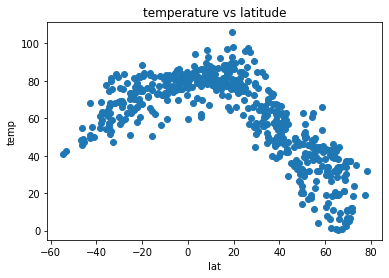

In [11]:
plt.scatter(dfi['lat'], dfi['temp'])
#plt.title('Tumor Vol vs Timepoint for mouse:',mouse)
plt.xlabel("lat")
plt.ylabel("temp")
plt.title("temperature vs latitude")



## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'temperature vs latitude')

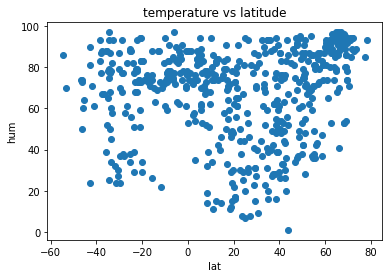

In [12]:
plt.scatter(dfi['lat'], dfi['hum'])
#plt.title('Tumor Vol vs Timepoint for mouse:',mouse)
plt.xlabel("lat")
plt.ylabel("hum")
plt.title("temperature vs latitude")


## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'cloud vs latitude')

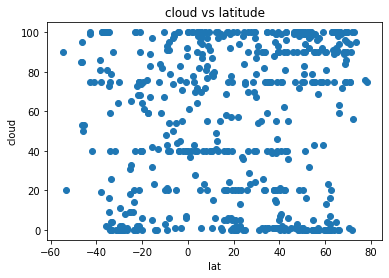

In [31]:
plt.scatter(dfi['lat'], dfi['cloud'])
plt.xlabel("lat")
plt.ylabel("cloud")
plt.title("cloud vs latitude")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'wind vs latitude')

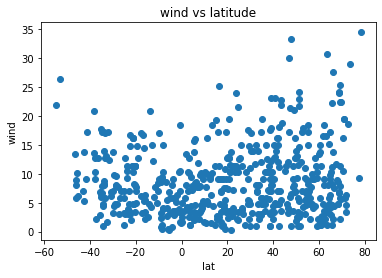

In [30]:
plt.scatter(dfi['lat'], dfi['wind'])
#plt.title('Tumor Vol vs Timepoint for mouse:',mouse)
plt.xlabel("lat")
plt.ylabel("wind")
plt.title("wind vs latitude")

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots

def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.87


Text(0, 24, 'R-sqr= 0.76')

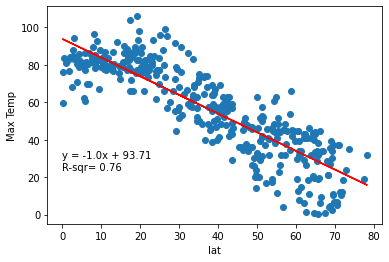

In [21]:
#x=dfn['lat']
#y=x=dfn['maxt']
x = np.array(dfn['lat'])
y = np.array(dfn['maxt'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rvalue = round(rvalue,2)
rsqr = round(rvalue**2,2)
rstring = str(rsqr)
rstring = 'R-sqr= '+ rstring
print (rvalue)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("lat")
plt.ylabel("Max Temp")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=10,color="black")
plt.annotate(rstring,(0,24),fontsize=10,color="black")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.7


Text(0, 24, 'R-sqr= 0.49')

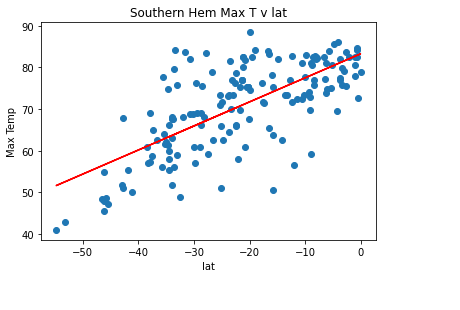

In [22]:
x = np.array(dfs['lat'])
y = np.array(dfs['maxt'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rvalue = round(rvalue,2)
rsqr = round(rvalue**2,2)
rstring = str(rsqr)
rstring = 'R-sqr= '+ rstring
print (rvalue)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("lat")
plt.ylabel("Max Temp")
plt.title("Southern Hem Max T v lat")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=10,color="black")
plt.annotate(rstring,(0,24),fontsize=10,color="black")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.3


Text(0, 24, 'R-sqr= 0.09')

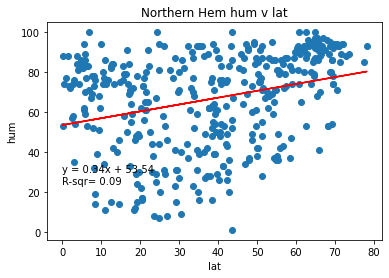

In [23]:
x = np.array(dfn['lat'])
y = np.array(dfn['hum'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rvalue = round(rvalue,2)
rsqr = round(rvalue**2,2)
rstring = str(rsqr)
rstring = 'R-sqr= '+ rstring
print (rvalue)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("lat")
plt.ylabel("hum")
plt.title("Northern Hem hum v lat")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=10,color="black")
plt.annotate(rstring,(0,24),fontsize=10,color="black")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.22


Text(0, 24, 'R-sqr= 0.05')

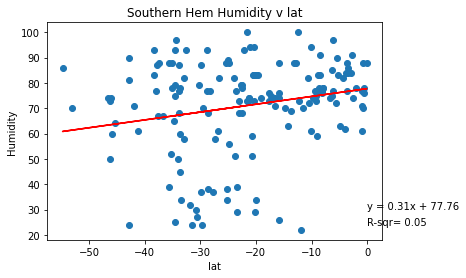

In [24]:
x = np.array(dfs['lat'])
y = np.array(dfs['hum'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rvalue = round(rvalue,2)
rsqr = round(rvalue**2,2)
rstring = str(rsqr)
rstring = 'R-sqr= '+ rstring
print (rvalue)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("lat")
plt.ylabel("Humidity")
plt.title("Southern Hem Humidity v lat")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=10,color="black")
plt.annotate(rstring,(0,24),fontsize=10,color="black")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.07


Text(0, 24, 'R-sqr= 0.0')

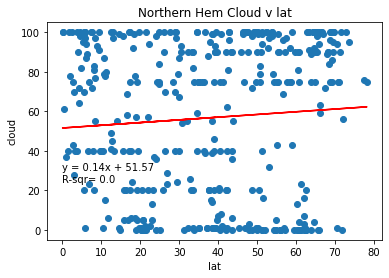

In [25]:
x = np.array(dfn['lat'])
y = np.array(dfn['cloud'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rvalue = round(rvalue,2)
rsqr = round(rvalue**2,2)
rstring = str(rsqr)
rstring = 'R-sqr= '+ rstring
print (rvalue)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("lat")
plt.ylabel("cloud")
plt.title("Northern Hem Cloud v lat")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=10,color="black")
plt.annotate(rstring,(0,24),fontsize=10,color="black")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.0


Text(0, 24, 'R-sqr= 0.0')

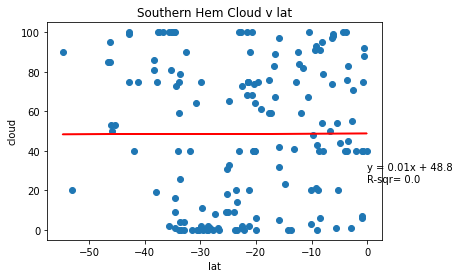

In [26]:
x = np.array(dfs['lat'])
y = np.array(dfs['cloud'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rvalue = round(rvalue,2)
rsqr = round(rvalue**2,2)
rstring = str(rsqr)
rstring = 'R-sqr= '+ rstring
print (rvalue)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("lat")
plt.ylabel("cloud")
plt.title("Southern Hem Cloud v lat")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=10,color="black")
plt.annotate(rstring,(0,24),fontsize=10,color="black")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.17


Text(0, 24, 'R-sqr= 0.03')

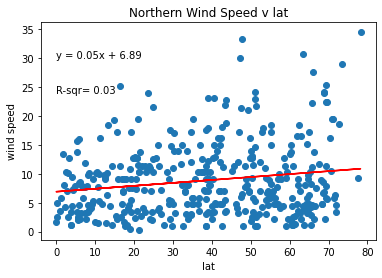

In [27]:
x = np.array(dfn['lat'])
y = np.array(dfn['wind'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rvalue = round(rvalue,2)
rsqr = round(rvalue**2,2)
rstring = str(rsqr)
rstring = 'R-sqr= '+ rstring
print (rvalue)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("lat")
plt.ylabel("wind speed")
plt.title("Northern Wind Speed v lat")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=10,color="black")
plt.annotate(rstring,(0,24),fontsize=10,color="black")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.33


Text(0, 22, 'R-sqr= 0.11')

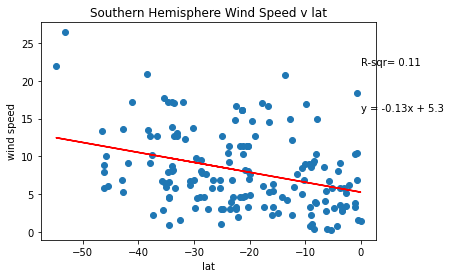

In [35]:
x = np.array(dfs['lat'])
y = np.array(dfs['wind'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rvalue = round(rvalue,2)
rsqr = round(rvalue**2,2)
rstring = str(rsqr)
rstring = 'R-sqr= '+ rstring
print (rvalue)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("lat")
plt.ylabel("wind speed")
plt.title("Southern Hemisphere Wind Speed v lat")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,16),fontsize=10,color="black")
plt.annotate(rstring,(0,22),fontsize=10,color="black")